# Signature Verification

1. Convert X, Y to Image (DPI = 200.0, GRAYSCALE)
2. Extract Feature Image to Waveforms
3. Get Pattern and turn into tree (Aho-Corasick Algoritms)
4. Identifikasi ( Verification with 10 Image from same folders )
5. Training with simple NN (Get Accuracy)
6. Compare another folder

# Convert Image RGB to Grayscale with DPI 200

In [28]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


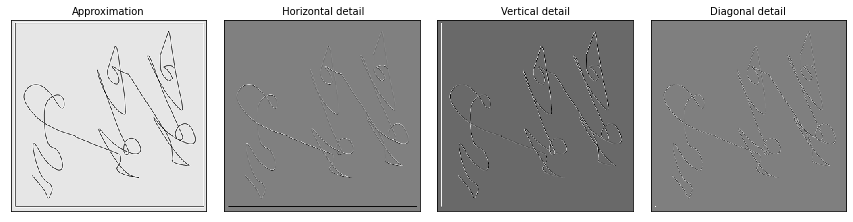

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = Image.open("D:/project_py_web/FREELANCER/HR_/Train/An Xiaoxiao/1.png").convert('L')

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [44]:
# Load image
original = Image.open("D:/project_py_web/FREELANCER/HR_/Train/An Xiaoxiao/1.png").convert('L')
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2

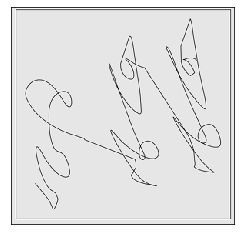

In [52]:
plt.imshow(LL, interpolation="nearest", cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([]);
plt.savefig("1.png")

In [53]:
image = Image.open("1.png")

In [55]:
image.tobytes()

b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x

In [56]:
from ahocorasick import Automaton

In [72]:
tree = Automaton()

In [68]:
tree.add_word(str(0), str(image.tobytes()))

True

In [78]:
for x,y in enumerate(image.tobytes()):
    tree.add_word(str(x), y)

In [750]:
import os
import pywt
from tqdm import tqdm
from PIL import Image
import ahocorasick
import matplotlib.pyplot as plt

In [751]:
def convert_image_grayscale_dpi(filename):
    image = Image.open(filename).convert("L").resize((500,500))
    image.save(filename, dpi=(200,200))

In [85]:
train_path = "D:\project_py_web\FREELANCER\HR_\Train\\".replace("\\","/")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:12<00:00, 19.29s/it]


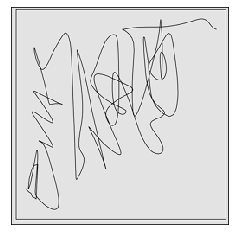

In [92]:
# convert original image (x,y) from dataframe to grayscale, dpi=200, waveform
for folder in tqdm(os.listdir(train_path)):
    for file in os.listdir(train_path+folder+"/"):
        convert_image_grayscale_dpi(train_path+folder+"/"+file)
        original = Image.open(train_path+folder+"/"+file)
        coeffs2 = pywt.dwt2(original, 'bior1.3')
        LL, (LH, HL, HH) = coeffs2
        plt.imshow(LL, interpolation="nearest", cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([]);
        plt.savefig(train_path+folder+"/"+file)

In [44]:
import pandas  as pd
import numpy as np
from ahocorasick import Automaton

In [15]:
pattern_found, folder_name = [], []

In [16]:
for folder in tqdm(os.listdir("D:/project_py_web/FREELANCER/HR_/Train/")):
    # store each folder
    folder_name.append(folder)
    # load image number one from each folder as assign
    ori = Image.open("D:/project_py_web/FREELANCER/HR_/Train/"+folder+"/1.png")
    # initialize structure tree aho-corasick
    tree = Automaton()
    # iterate each column pixel and convert to byte for assign as pattern
    for x in range(ori.size[1]):
        index = str(x)
        # convert array of value [255,255,255,255] to bytes
        value = str(np.asarray(ori)[x].tobytes())
        # assign to structure
        tree.add_word(index, value)
    for x in range(2,11):
        #  find similar pattern base assign pattern
        similarity = 0
        # load image, image already grayscale & dpi already 200
        test = Image.open(f"D:/project_py_web/FREELANCER/HR_/Train/{folder}/{x}.png")
        # convert array of image to bytes and find similarity
        for x in range(test.size[1]):
            index = str(x)
            value = str(np.asarray(test)[x].tobytes())
            if tree.get(index, value) != None :
                # found will increase base their similarity
                similarity += 1
            else :
                pass
        # append our found similarity for create histogram later
        pattern_found.append(similarity)
        # clear ahocorasick pattern for new pattern
        Automaton.clear(tree)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.76s/it]


In [93]:
history = pd.DataFrame(columns=[f"PATTERN {X}" for X in range(2,11)])
history["FOLDER"] = folder_name
history = history.drop("FOLDER",axis=1).fillna(288).astype(int)
history["FOLDER"] = folder_name

In [94]:
history

PATTERN 2  PATTERN 3  PATTERN 4  PATTERN 5  PATTERN 6  PATTERN 7  \
0        288        288        288        288        288        288   
1        288        288        288        288        288        288   
2        288        288        288        288        288        288   
3        288        288        288        288        288        288   
4        288        288        288        288        288        288   
5        288        288        288        288        288        288   
6        288        288        288        288        288        288   
7        288        288        288        288        288        288   
8        288        288        288        288        288        288   
9        288        288        288        288        288        288   

   PATTERN 8  PATTERN 9  PATTERN 10       FOLDER  
0        288        288         288  An Xiaoxiao  
1        288        288         288      Chen He  
2        288        288         288   He Xialong  
3        288        288         288     Ji Yuzhu  
4        288        288         288    Li Dachao  
5        288        288         288    Li Jaqian  
6        288        288         288     Li Yifan  
7        288        288         288     Luo jiao  
8        288        288         288      Tang li  
9        288        288         288   Wu Haitong

In [96]:
# import the necessary packages
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import os
from tqdm import tqdm

In [97]:
# initialize the index dictionary to store the image name
# and corresponding histograms and the images dictionary
# to store the images themselves
index = {}
images = {}

# loop over the image paths
for imagePath in tqdm(os.listdir("D:/project_py_web/FREELANCER/HR_/Train/An Xiaoxiao")):
    # extract the image filename (assumed to be unique) and
    # load the image, updating the images dictionary
    filename = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread("D:/project_py_web/FREELANCER/HR_/Train/An Xiaoxiao/"+imagePath)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    index[filename] = hist

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 158.69it/s]


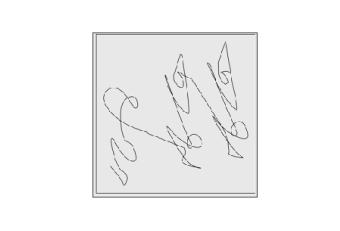

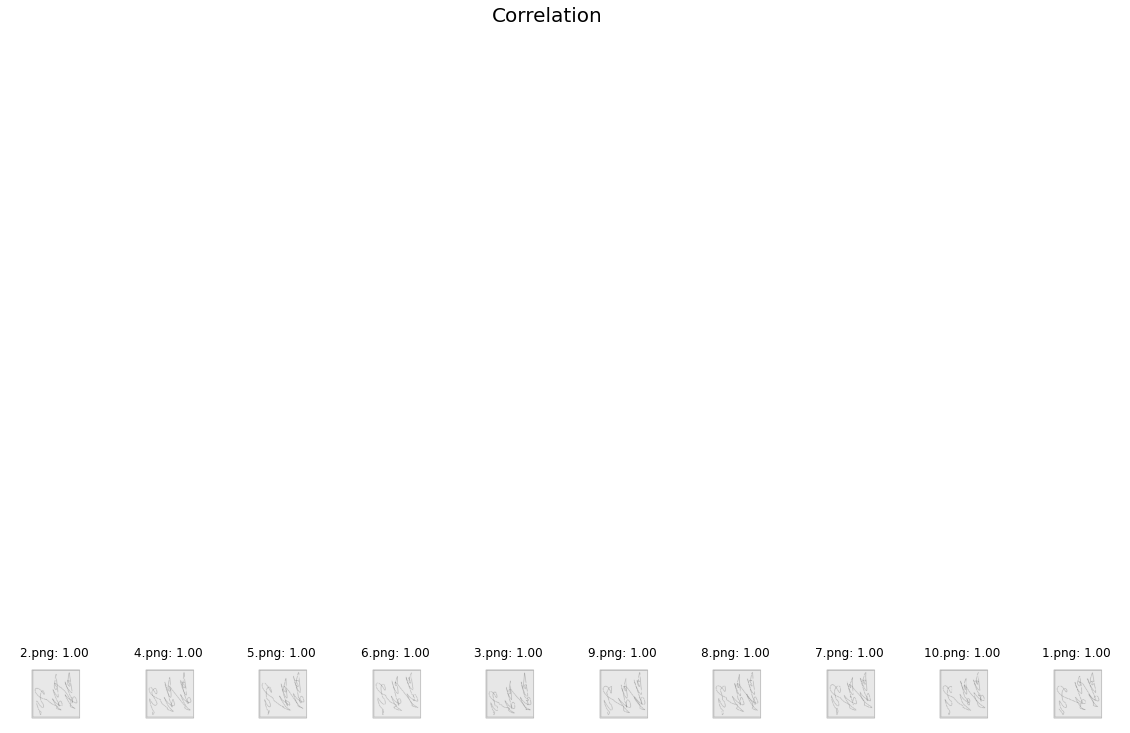

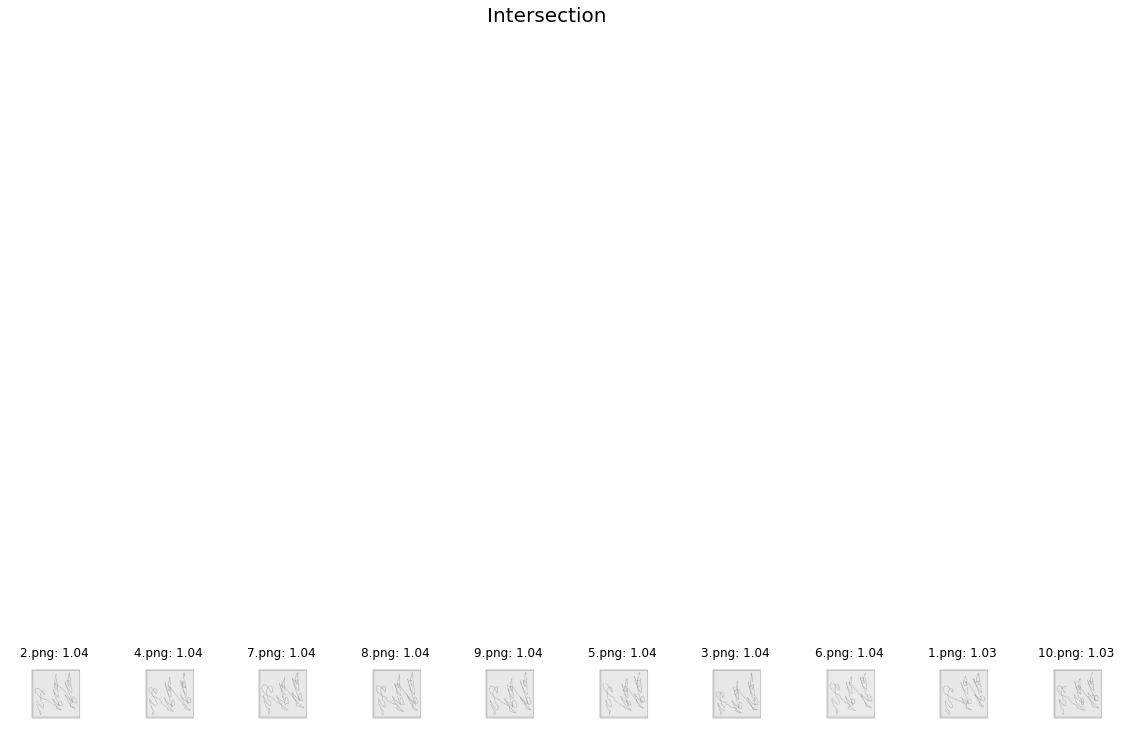

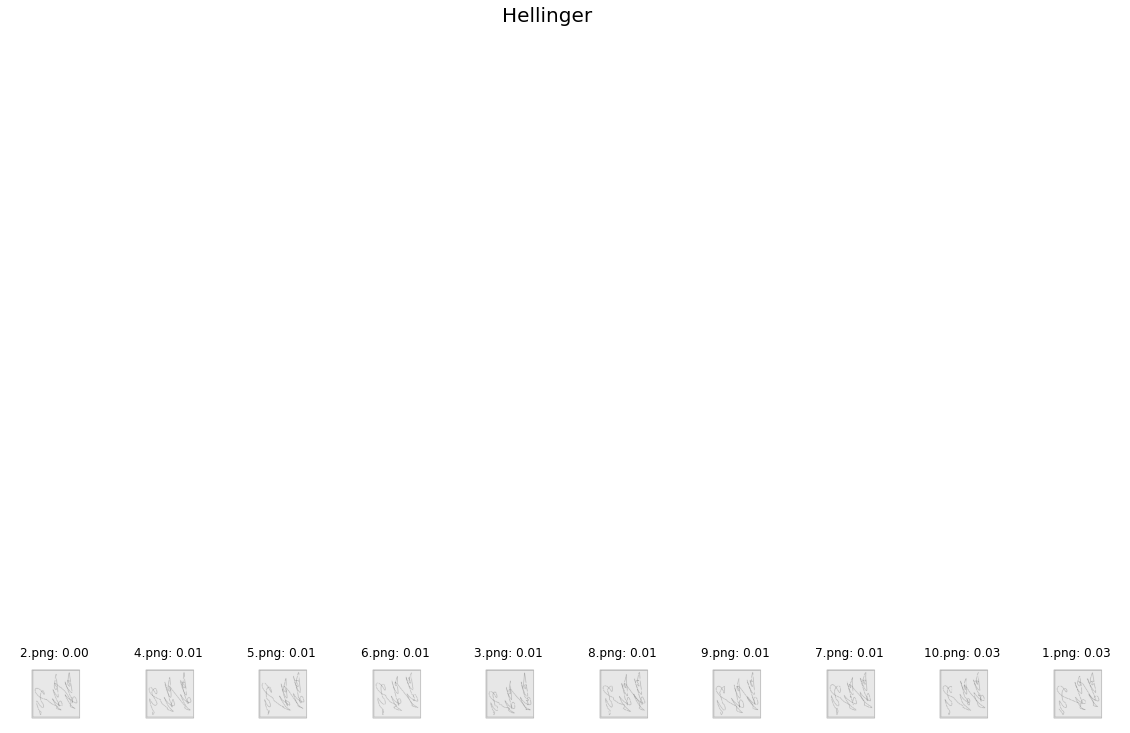

In [100]:
from warnings import filterwarnings; filterwarnings("ignore")
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
# loop over the comparison methods
for methodName, method in OPENCV_METHODS:
    # initialize the results dictionary and the sort
    # direction
    results = {}
    reverse = False
    # if we are using the correlation or intersection
    # method, then sort the results in reverse order
    if methodName in ("Correlation", "Intersection"):
        reverse = True
    # loop over the index
    for (k, hist) in index.items():
        # compute the distance between the two histograms
        # using the method and update the results dictionary
        d = cv2.compareHist(index["2.png"], hist, method)
        results[k] = d
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
        # show the query image
    fig = plt.figure("Query")
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images["1.png"])
    plt.axis("off")
    # initialize the results figure
    fig = plt.figure("Results: %s" % (methodName), figsize=(20,20))
    fig.suptitle(methodName, fontsize = 20)
    # loop over the results
    for (i, (v, k)) in enumerate(results):
        # show the result
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%s: %.2f" % (k, v))
        plt.imshow(images[k])
        plt.axis("off")
# show the OpenCV methods
plt.show()

# Data Modeling CNN-LSTM 

In [617]:
import os
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.layers import ConvLSTM2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [606]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root ="D:\project_py_web\FREELANCER\HR_\Train".replace("\\","/")
width=256
height=256
depth=3

In [607]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [608]:
image_list, label_list = [], []
try :
    root_dir = os.listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for folder in root_dir :
        folder_list = os.listdir(f"{directory_root}/{folder}")
except Exception:
    pass

In [609]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    for folder in tqdm(os.listdir(directory_root)):
        for file in os.listdir(directory_root+"/"+folder+"/"):
            curr_path = directory_root+"/"+folder+"/"+file
            image_list.append(convert_image_to_array(curr_path))
            label_list.append(folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[INFO] Loading images ...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.35it/s]

[INFO] Image loading completed


In [610]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)

In [611]:
image_size = len(image_list)

In [612]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [614]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.4, random_state = 1) 

[INFO] Spliting data to train, test


In [615]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [770]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (8, 8), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [769]:
n_classes

10

In [771]:
model.summary()

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
activation_107 (Activation)  (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 85, 85, 64)        51264     
_________________________________________________________________
activation_108 (Activation)  (None, 85, 85, 64)     

In [772]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [773]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

Epoch 1/50
1/1 [==============================] - 66s 66s/step - loss: 1.0604 - accuracy: 0.2143 - val_loss: 0.8715 - val_accuracy: 0.1000
Epoch 2/50
1/1 [==============================] - 51s 51s/step - loss: 1.2708 - accuracy: 0.2500 - val_loss: 0.9477 - val_accuracy: 0.1000
Epoch 3/50
1/1 [==============================] - 45s 45s/step - loss: 1.0921 - accuracy: 0.1562 - val_loss: 0.9480 - val_accuracy: 0.1000
Epoch 4/50
1/1 [==============================] - 43s 43s/step - loss: 1.0632 - accuracy: 0.0714 - val_loss: 0.9455 - val_accuracy: 0.1000
Epoch 5/50
1/1 [==============================] - 48s 48s/step - loss: 0.9783 - accuracy: 0.0938 - val_loss: 0.9639 - val_accuracy: 0.0750
Epoch 6/50
1/1 [==============================] - 42s 42s/step - loss: 0.9911 - accuracy: 0.1071 - val_loss: 0.9992 - val_accuracy: 0.0750
Epoch 7/50
1/1 [==============================] - 47s 47s/step - loss: 0.8908 - accuracy: 0.2188 - val_loss: 1.0613 - val_accuracy: 0.0750
Epoch 8/50
1/1 [===========

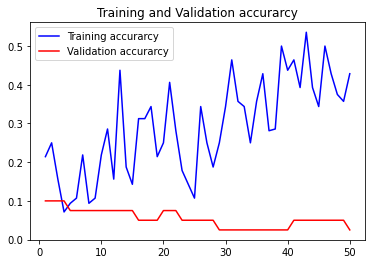

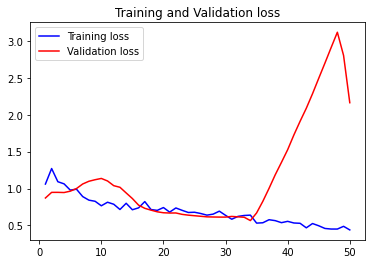

In [775]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [627]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2/2 [==============================] - 10s 2s/step - loss: 0.4708 - accuracy: 0.1500
Test Accuracy: 15.000000596046448


# Other Model

In [293]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19

In [292]:
# image size
SIZE = [224, 224]

In [294]:
# vgg using imagenet weight
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

80142336/80134624 [==============================] - 133s 2us/step


In [295]:
for layer in vg19.layers:
    layer.trainable = False
x = Flatten()(vg19.output)
prediction = Dense(n_classes, activation="softmax")(x)
modelvg = Model(inputs=vg19.input, outputs=prediction)

In [296]:
# VGG19 
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [297]:
# compile
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [298]:
# data augmentation
train_datagen_vg19 = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [299]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 100 images belonging to 10 classes.


In [300]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 100 images belonging to 10 classes.


In [302]:
# model fit generator
r_vg19 = modelvg.fit_generator(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=20,
                       steps_per_epoch=len(trainning_set_vg19),
                       validation_steps=len(testing_set_vg19)
                       )

Epoch 1/30
4/4 [==============================] - 260s 70s/step - loss: 4.1953 - accuracy: 0.0569 - val_loss: 4.3423 - val_accuracy: 0.1000
Epoch 2/30
4/4 [==============================] - 239s 67s/step - loss: 3.8959 - accuracy: 0.0959 - val_loss: 3.2014 - val_accuracy: 0.1400
Epoch 3/30
4/4 [==============================] - 243s 68s/step - loss: 3.0532 - accuracy: 0.1676 - val_loss: 3.6973 - val_accuracy: 0.1700
Epoch 4/30
4/4 [==============================] - 255s 83s/step - loss: 2.9447 - accuracy: 0.2276 - val_loss: 2.2214 - val_accuracy: 0.3500
Epoch 5/30
4/4 [==============================] - 256s 71s/step - loss: 1.8941 - accuracy: 0.3854 - val_loss: 2.0622 - val_accuracy: 0.2300
Epoch 6/30
4/4 [==============================] - 237s 65s/step - loss: 1.7467 - accuracy: 0.3354 - val_loss: 2.3585 - val_accuracy: 0.2600
Epoch 7/30
4/4 [==============================] - 231s 75s/step - loss: 1.4432 - accuracy: 0.5426 - val_loss: 2.4990 - val_accuracy: 0.3400
Epoch 8/30
4/4 [====

KeyboardInterrupt: 

# Timeforecasting LSTM-CNN

In [304]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

# Analysis

In [311]:
# combine same signature dataset into one for training\
path = "D:\project_py_web\FREELANCER\HR_\core\An Xiaoxiao\\".replace("\\","/")
data = []

In [312]:
# iterate multiple dataframe into one for learning
for file in os.listdir(path):
    df = pd.read_csv(path+file)
    data.append(df)

In [318]:
# combine all dataset
df_final = pd.concat(data)
df_final = df_final.drop("Unnamed: 0", axis=1)

In [319]:
df_final.head()

id     x     y  b  p  sec  milli
0  197  1661  1364  3  0    0     89
1  198  1661  1364  3  0    0     97
2  199  1661  1364  3  0    0    104
3  200  1661  1364  3  0    0    110
4  201  1661  1364  3  0    0    117

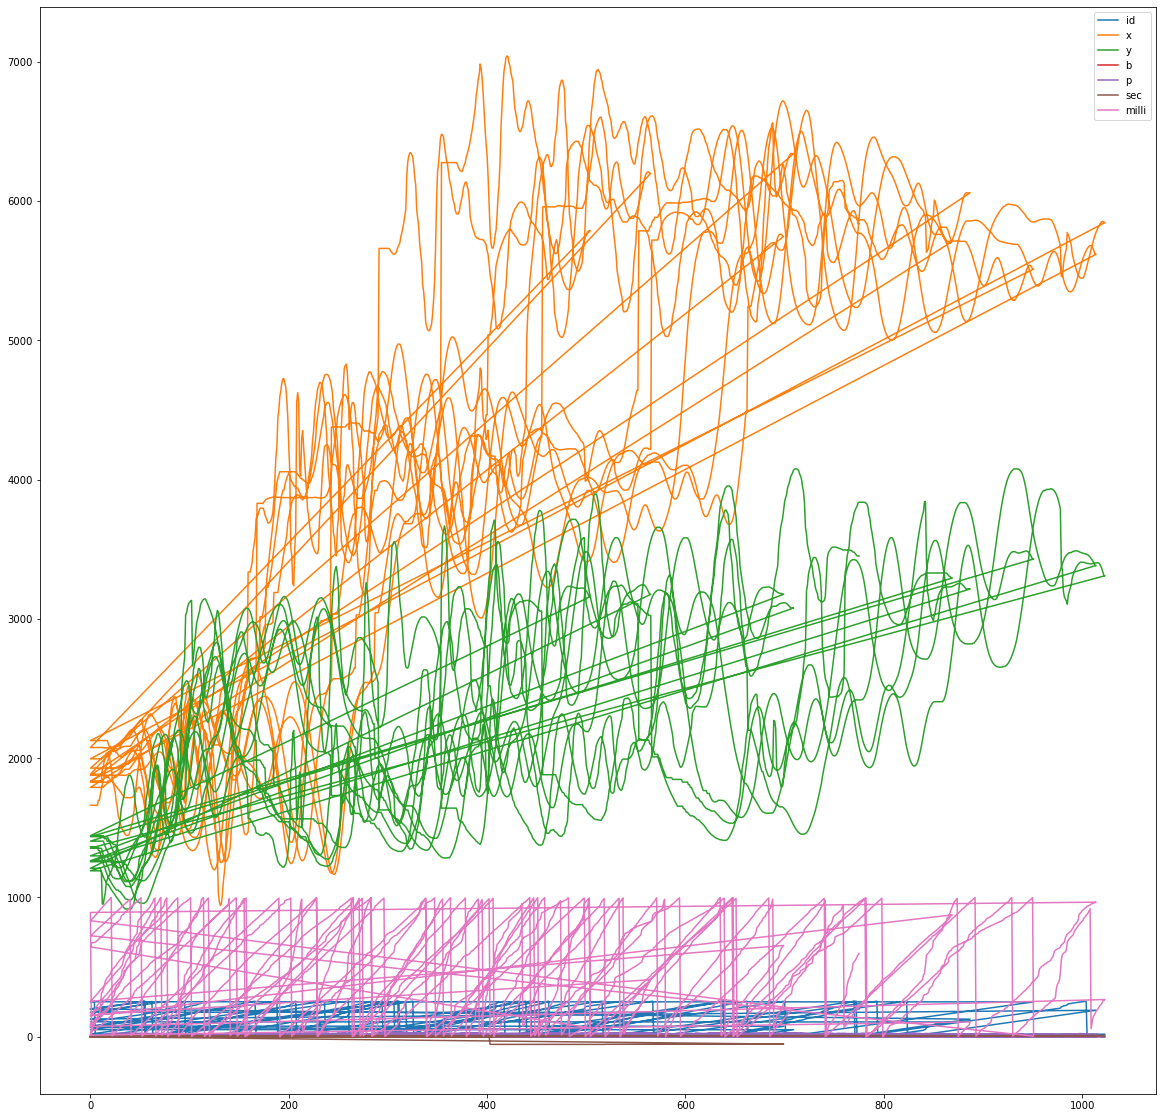

In [328]:
df_final.plot(figsize=(20,20));

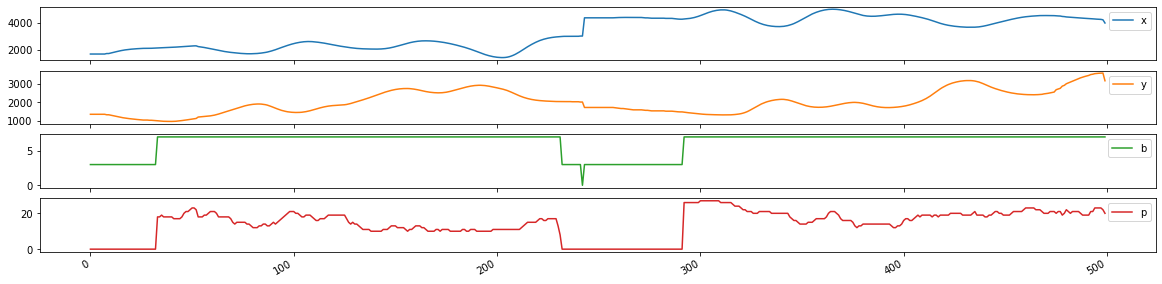

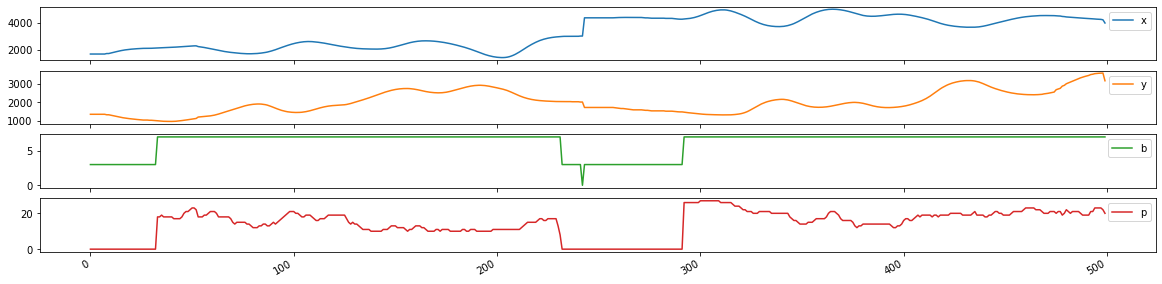

In [336]:
plot_cols = ['x', 'y', 'b', 'p']
plot_features = df_final[plot_cols][:500]
plot_features.index = [x for x in range(len(df_final))][:500] #date_time[:480]
_ = plot_features.plot(subplots=True,figsize=(20,5))

plot_features = df_final[plot_cols][:500]
plot_features.index = [x for x in range(len(df_final))][:500] #date_time[:480]
_ = plot_features.plot(subplots=True,figsize=(20,5))

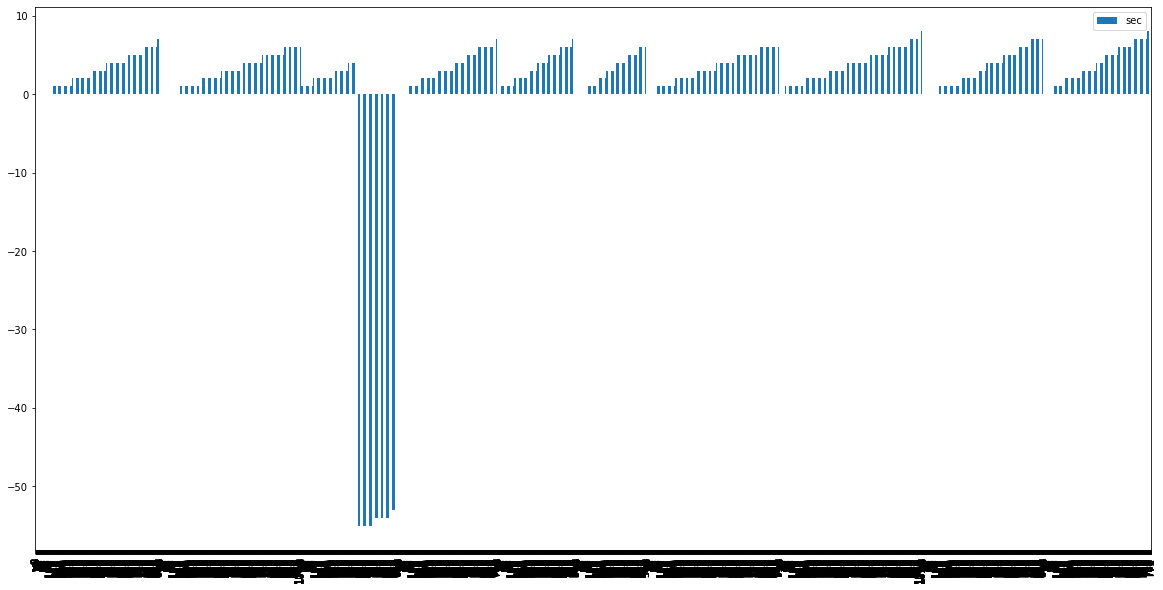

In [349]:
df_final.plot(y="sec", kind="bar", figsize=(20,10));

# Data Preprocessing

In [351]:
df_final.head()

id     x     y  b  p  sec  milli
0  197  1661  1364  3  0    0     89
1  198  1661  1364  3  0    0     97
2  199  1661  1364  3  0    0    104
3  200  1661  1364  3  0    0    110
4  201  1661  1364  3  0    0    117

In [350]:
from keras.preprocessing import timeseries_dataset_from_array

In [410]:
input_data = df_final[:-7000]
targets = df_final[7000:]
dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    input_data, targets, sequence_length=4)

In [411]:
for x in tqdm(dataset):
    training, label= x

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.69it/s]


In [412]:
# define variables
X = training
y = label

In [413]:
X.shape

TensorShape([107, 4, 7])

In [414]:
# splitting dataset
X_train, X_test, y_train, y_test = X[:84], X[84:], y[:84], y[84:]

In [420]:
y_train.shape

TensorShape([84, 7])

In [421]:
# now creating Stacked unidirectional L.S.T.M
from keras import Sequential
from keras.layers import Dense, LSTM

model_uni = Sequential()
model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(4,7)))
model_uni.add(LSTM(150))
model_uni.add(Dense(7))

print(model_uni.summary())
model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 4, 200)            166400    
_________________________________________________________________
lstm_21 (LSTM)               (None, 150)               210600    
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 1057      
Total params: 378,057
Trainable params: 378,057
Non-trainable params: 0
_________________________________________________________________
None


In [422]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model_unit.h5', verbose=1, save_best_only=True)
]



history_uni = model_uni.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test), batch_size=32, callbacks=callbacks)

Epoch 1/100
3/3 [==============================] - 17s 1s/step - loss: 6763344.0000 - accuracy: 0.1734 - val_loss: 6528918.5000 - val_accuracy: 0.1739

Epoch 00001: val_loss improved from inf to 6528918.50000, saving model to model_unit.h5
Epoch 2/100
3/3 [==============================] - 0s 178ms/step - loss: 6719821.8750 - accuracy: 0.8075 - val_loss: 6529035.0000 - val_accuracy: 0.2174

Epoch 00002: val_loss did not improve from 6528918.50000
Epoch 3/100
3/3 [==============================] - 0s 179ms/step - loss: 6720660.5000 - accuracy: 0.9548 - val_loss: 6527353.0000 - val_accuracy: 0.8261

Epoch 00003: val_loss improved from 6528918.50000 to 6527353.00000, saving model to model_unit.h5
Epoch 4/100
3/3 [==============================] - 0s 204ms/step - loss: 6743005.3750 - accuracy: 1.0000 - val_loss: 6526305.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 6527353.00000 to 6526305.50000, saving model to model_unit.h5
Epoch 5/100
3/3 [============================

Epoch 34/100
3/3 [==============================] - 0s 168ms/step - loss: 6702986.8750 - accuracy: 1.0000 - val_loss: 6497315.0000 - val_accuracy: 1.0000

Epoch 00034: val_loss improved from 6498101.00000 to 6497315.00000, saving model to model_unit.h5
Epoch 35/100
3/3 [==============================] - 0s 188ms/step - loss: 6720018.0000 - accuracy: 1.0000 - val_loss: 6496509.0000 - val_accuracy: 1.0000

Epoch 00035: val_loss improved from 6497315.00000 to 6496509.00000, saving model to model_unit.h5
Epoch 36/100
3/3 [==============================] - 0s 149ms/step - loss: 6743709.5000 - accuracy: 1.0000 - val_loss: 6495794.0000 - val_accuracy: 1.0000

Epoch 00036: val_loss improved from 6496509.00000 to 6495794.00000, saving model to model_unit.h5
Epoch 37/100
3/3 [==============================] - 0s 177ms/step - loss: 6715209.1250 - accuracy: 1.0000 - val_loss: 6495049.5000 - val_accuracy: 1.0000

Epoch 00037: val_loss improved from 6495794.00000 to 6495049.50000, saving model to mo

3/3 [==============================] - 0s 125ms/step - loss: 6700436.7500 - accuracy: 1.0000 - val_loss: 6475116.5000 - val_accuracy: 1.0000

Epoch 00066: val_loss improved from 6475776.00000 to 6475116.50000, saving model to model_unit.h5
Epoch 67/100
3/3 [==============================] - 1s 493ms/step - loss: 6676912.1250 - accuracy: 1.0000 - val_loss: 6474460.0000 - val_accuracy: 1.0000

Epoch 00067: val_loss improved from 6475116.50000 to 6474460.00000, saving model to model_unit.h5
Epoch 68/100
3/3 [==============================] - 1s 226ms/step - loss: 6676137.2500 - accuracy: 1.0000 - val_loss: 6473804.5000 - val_accuracy: 1.0000

Epoch 00068: val_loss improved from 6474460.00000 to 6473804.50000, saving model to model_unit.h5
Epoch 69/100
3/3 [==============================] - 1s 239ms/step - loss: 6705119.0000 - accuracy: 1.0000 - val_loss: 6473150.5000 - val_accuracy: 1.0000

Epoch 00069: val_loss improved from 6473804.50000 to 6473150.50000, saving model to model_unit.h5
E


Epoch 00098: val_loss improved from 6455273.50000 to 6454645.00000, saving model to model_unit.h5
Epoch 99/100
3/3 [==============================] - 0s 162ms/step - loss: 6650513.2500 - accuracy: 1.0000 - val_loss: 6454017.5000 - val_accuracy: 1.0000

Epoch 00099: val_loss improved from 6454645.00000 to 6454017.50000, saving model to model_unit.h5
Epoch 100/100
3/3 [==============================] - 0s 165ms/step - loss: 6657619.8750 - accuracy: 1.0000 - val_loss: 6453390.0000 - val_accuracy: 1.0000

Epoch 00100: val_loss improved from 6454017.50000 to 6453390.00000, saving model to model_unit.h5


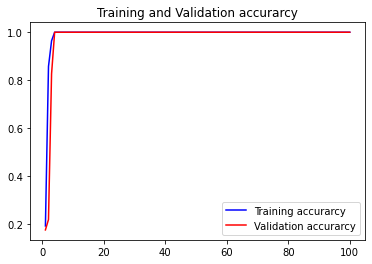

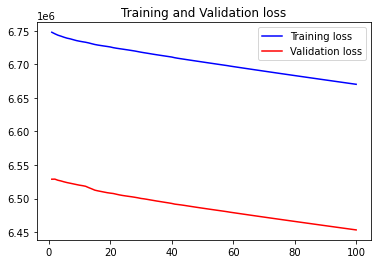

In [424]:
acc = history_uni.history['accuracy']
val_acc = history_uni.history['val_accuracy']
loss = history_uni.history['loss']
val_loss = history_uni.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Evaluate

In [448]:
from sklearn import metrics
def evaluate_performace(y_true,y_predicted):
    scores = []
    # calcualte scores per day
    for i in range(y_true.shape[1]):
        mse = metrics.mean_squared_error(y_true[:,1],y_predicted[:,1])
        rmse = np.sqrt(mse)
        scores.append(rmse)
        
    # calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row,col] - y_predicted[row,col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    return(total_score,scores) 

In [449]:
print("rmse in bidirectional stacked lstm",evaluate_performace(y_test,res)[0])

rmse in bidirectional stacked lstm 2540.6145023772183


In [450]:
print("std deviation in y_true",np.std(y_test[:,0]))

std deviation in y_true 6.6332495807108


# Experimental Result & Comparison each feature

Each Pattern Compare with their feature

# X

In [457]:
accu, fold = [],[]

In [465]:
# combine same signature dataset into one for training\
for folder in os.listdir("D:/project_py_web/FREELANCER/HR_/core/"):
    try:
        path = f"D:\project_py_web\FREELANCER\HR_\core\\"+folder+"\\".replace("\\","/")
        data = []
        # iterate multiple dataframe into one for learning
        for file in os.listdir(path):
            df = pd.read_csv(path+file)
            data.append(df)

        # combine all dataset
        df_final = pd.concat(data)
        df_final = df_final["x"]

        input_data = df_final[:-7000]
        targets = df_final[7000:]
        dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
            input_data, targets, sequence_length=4)
        for x in tqdm(dataset):
            training, label= x
        # splitting dataset
        X_train, X_test, y_train, y_test = X[:84], X[84:], y[:84], y[84:]
        model_uni = Sequential()
        model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(4,7)))
        model_uni.add(LSTM(150))
        model_uni.add(Dense(7))

        #print(model_uni.summary())
        model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        history_uni = model_uni.fit(X_train, y_train, epochs=25,validation_data=(X_test,y_test), batch_size=32, callbacks=callbacks)
        accu.append(min(history_uni.history["accuracy"]))
        fold.append(folder)
    except :
        print(folder)
        pass

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.41it/s]


Epoch 1/25
3/3 [==============================] - 12s 1s/step - loss: 6751871.1250 - accuracy: 0.0000e+00 - val_loss: 6529333.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 112ms/step - loss: 6758558.0000 - accuracy: 0.3666 - val_loss: 6528828.0000 - val_accuracy: 0.6522

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 114ms/step - loss: 6733680.2500 - accuracy: 0.9174 - val_loss: 6528353.5000 - val_accuracy: 0.9565

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 112ms/step - loss: 6739467.8750 - accuracy: 1.0000 - val_loss: 6527310.5000 - val_accuracy: 0.8696

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 124ms/step - loss: 6743563.8750 - accuracy: 1.0000 - val_loss: 6526380.5000 - val_accuracy: 0.9130

E

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 35.25it/s]


Epoch 1/25
3/3 [==============================] - 11s 931ms/step - loss: 6713114.1250 - accuracy: 0.2682 - val_loss: 6529097.0000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 103ms/step - loss: 6718917.0000 - accuracy: 0.7439 - val_loss: 6526962.0000 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 130ms/step - loss: 6711086.5000 - accuracy: 0.8566 - val_loss: 6525127.0000 - val_accuracy: 0.0870

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 114ms/step - loss: 6748865.6250 - accuracy: 0.9470 - val_loss: 6523638.5000 - val_accuracy: 0.9130

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 120ms/step - loss: 6734078.2500 - accuracy: 1.0000 - val_loss: 6522603.0000 - val_accuracy: 0.7391

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 30.42it/s]


Epoch 1/25
3/3 [==============================] - 11s 1s/step - loss: 6789223.2500 - accuracy: 0.3376 - val_loss: 6527452.0000 - val_accuracy: 0.4348

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 114ms/step - loss: 6737549.1250 - accuracy: 0.9407 - val_loss: 6525609.5000 - val_accuracy: 0.7391

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 147ms/step - loss: 6765846.6250 - accuracy: 0.9470 - val_loss: 6523639.0000 - val_accuracy: 0.9565

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 138ms/step - loss: 6735663.1250 - accuracy: 1.0000 - val_loss: 6522402.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 117ms/step - loss: 6738956.3750 - accuracy: 1.0000 - val_loss: 6521616.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:01<00:00, 36.52it/s]


Epoch 1/25
3/3 [==============================] - 12s 1s/step - loss: 6706658.0000 - accuracy: 0.3728 - val_loss: 6526313.0000 - val_accuracy: 1.0000

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 126ms/step - loss: 6766884.8750 - accuracy: 0.8586 - val_loss: 6524193.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 131ms/step - loss: 6750368.0000 - accuracy: 1.0000 - val_loss: 6522458.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 118ms/step - loss: 6699683.6250 - accuracy: 1.0000 - val_loss: 6522095.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 122ms/step - loss: 6753857.6250 - accuracy: 1.0000 - val_loss: 6520945.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.04it/s]


Epoch 1/25
3/3 [==============================] - 11s 909ms/step - loss: 6737983.3750 - accuracy: 0.6265 - val_loss: 6528109.0000 - val_accuracy: 0.7826

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 94ms/step - loss: 6746322.2500 - accuracy: 0.9587 - val_loss: 6526723.5000 - val_accuracy: 0.8261

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 103ms/step - loss: 6769185.3750 - accuracy: 0.9940 - val_loss: 6525603.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 107ms/step - loss: 6738608.7500 - accuracy: 1.0000 - val_loss: 6524200.5000 - val_accuracy: 0.9565

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 98ms/step - loss: 6712512.8750 - accuracy: 1.0000 - val_loss: 6523056.0000 - val_accuracy: 1.0000

Epoch 00

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 29.46it/s]


Epoch 1/25
3/3 [==============================] - 10s 964ms/step - loss: 6739295.3750 - accuracy: 0.5874 - val_loss: 6527327.5000 - val_accuracy: 1.0000

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 95ms/step - loss: 6746297.0000 - accuracy: 1.0000 - val_loss: 6525952.0000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 116ms/step - loss: 6750570.3750 - accuracy: 1.0000 - val_loss: 6524521.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 98ms/step - loss: 6722299.7500 - accuracy: 1.0000 - val_loss: 6522309.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 108ms/step - loss: 6723624.3750 - accuracy: 1.0000 - val_loss: 6520968.5000 - val_accuracy: 1.0000

Epoch 00

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.33it/s]


Epoch 1/25
3/3 [==============================] - 12s 1s/step - loss: 6747254.0000 - accuracy: 0.2346 - val_loss: 6527611.0000 - val_accuracy: 0.4348

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 117ms/step - loss: 6726527.7500 - accuracy: 0.4412 - val_loss: 6526034.0000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 112ms/step - loss: 6729086.2500 - accuracy: 0.7638 - val_loss: 6523714.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 127ms/step - loss: 6741334.3750 - accuracy: 0.8566 - val_loss: 6523116.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 122ms/step - loss: 6742260.1250 - accuracy: 1.0000 - val_loss: 6521665.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 30.03it/s]


Epoch 1/25
3/3 [==============================] - 10s 997ms/step - loss: 6767258.2500 - accuracy: 0.5398 - val_loss: 6530639.5000 - val_accuracy: 0.1739

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 104ms/step - loss: 6741669.7500 - accuracy: 0.9743 - val_loss: 6530632.5000 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 112ms/step - loss: 6762058.0000 - accuracy: 0.9725 - val_loss: 6529635.5000 - val_accuracy: 0.1304

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 117ms/step - loss: 6734448.6250 - accuracy: 1.0000 - val_loss: 6528805.5000 - val_accuracy: 0.4348

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 116ms/step - loss: 6714386.5000 - accuracy: 1.0000 - val_loss: 6527812.0000 - val_accuracy: 0.4783

Ep

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 21.90it/s]


Epoch 1/25
3/3 [==============================] - 9s 876ms/step - loss: 6771923.6250 - accuracy: 0.3023 - val_loss: 6527962.5000 - val_accuracy: 0.9130

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 88ms/step - loss: 6731108.7500 - accuracy: 1.0000 - val_loss: 6526551.0000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 100ms/step - loss: 6748935.2500 - accuracy: 1.0000 - val_loss: 6525500.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 101ms/step - loss: 6713140.3750 - accuracy: 1.0000 - val_loss: 6524607.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 98ms/step - loss: 6730190.7500 - accuracy: 1.0000 - val_loss: 6523638.5000 - val_accuracy: 1.0000

Epoch 000

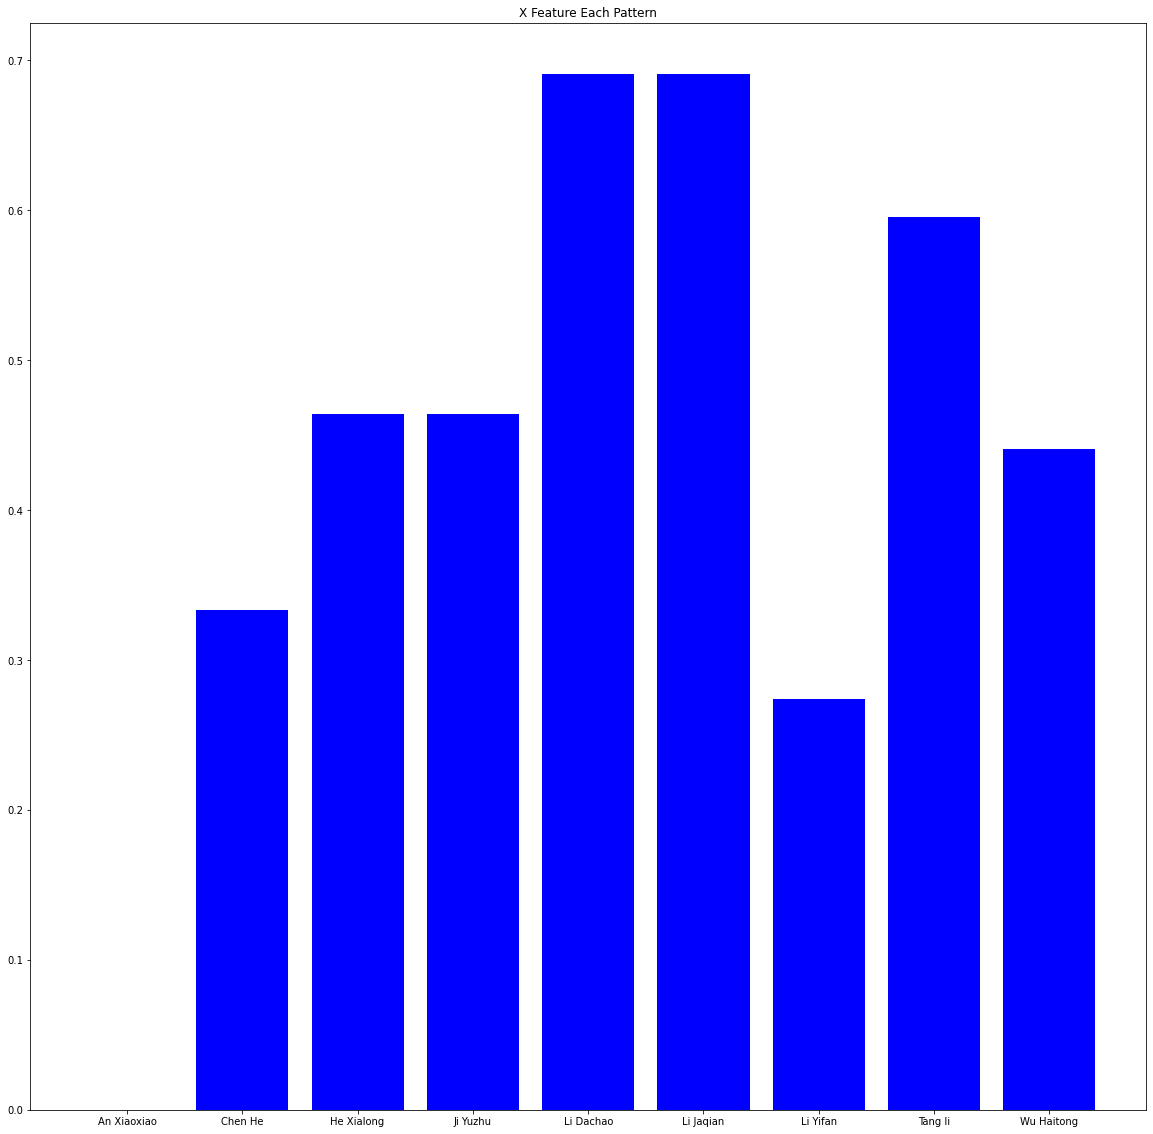

In [468]:
plt.figure(figsize=(20,20))
plt.title("X Feature Each Pattern")
plt.bar([x for x in range(1,10)], accu, color="blue")
plt.xticks([x for x in range(1,10)], fold);

# Y

In [469]:
accu, fold = [],[]

In [470]:
# combine same signature dataset into one for training\
for folder in os.listdir("D:/project_py_web/FREELANCER/HR_/core/"):
    try:
        path = f"D:\project_py_web\FREELANCER\HR_\core\\"+folder+"\\".replace("\\","/")
        data = []
        # iterate multiple dataframe into one for learning
        for file in os.listdir(path):
            df = pd.read_csv(path+file)
            data.append(df)

        # combine all dataset
        df_final = pd.concat(data)
        df_final = df_final["y"]

        input_data = df_final[:-7000]
        targets = df_final[7000:]
        dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
            input_data, targets, sequence_length=4)
        for x in tqdm(dataset):
            training, label= x
        # splitting dataset
        X_train, X_test, y_train, y_test = X[:84], X[84:], y[:84], y[84:]
        model_uni = Sequential()
        model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(4,7)))
        model_uni.add(LSTM(150))
        model_uni.add(Dense(7))

        #print(model_uni.summary())
        model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        history_uni = model_uni.fit(X_train, y_train, epochs=25,validation_data=(X_test,y_test), batch_size=32, callbacks=callbacks)
        accu.append(min(history_uni.history["accuracy"]))
        fold.append(folder)
    except :
        print(folder)
        pass

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.88it/s]


Epoch 1/25
3/3 [==============================] - 11s 918ms/step - loss: 6723833.5000 - accuracy: 0.3194 - val_loss: 6528243.5000 - val_accuracy: 0.2609

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 104ms/step - loss: 6748252.5000 - accuracy: 1.0000 - val_loss: 6524873.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 133ms/step - loss: 6752019.5000 - accuracy: 1.0000 - val_loss: 6523032.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 134ms/step - loss: 6699823.5000 - accuracy: 1.0000 - val_loss: 6520814.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 125ms/step - loss: 6706043.3750 - accuracy: 1.0000 - val_loss: 6519518.5000 - val_accuracy: 1.0000

Epoch 

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 26.90it/s]


Epoch 1/25
3/3 [==============================] - 10s 991ms/step - loss: 6759531.7500 - accuracy: 0.0417 - val_loss: 6528387.0000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 99ms/step - loss: 6707567.0000 - accuracy: 0.7152 - val_loss: 6527171.0000 - val_accuracy: 0.1739

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 108ms/step - loss: 6763110.8750 - accuracy: 1.0000 - val_loss: 6526126.5000 - val_accuracy: 0.3478

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 103ms/step - loss: 6748223.5000 - accuracy: 1.0000 - val_loss: 6524526.0000 - val_accuracy: 0.8696

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 112ms/step - loss: 6713629.1250 - accuracy: 1.0000 - val_loss: 6523543.0000 - val_accuracy: 1.0000

Epo

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 43.80it/s]


Epoch 1/25
3/3 [==============================] - 13s 1s/step - loss: 6722454.6250 - accuracy: 0.1029 - val_loss: 6526672.0000 - val_accuracy: 1.0000

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 115ms/step - loss: 6748041.8750 - accuracy: 0.5143 - val_loss: 6524192.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 128ms/step - loss: 6737665.7500 - accuracy: 0.8739 - val_loss: 6522720.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 108ms/step - loss: 6744499.8750 - accuracy: 0.8367 - val_loss: 6521671.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 113ms/step - loss: 6738532.7500 - accuracy: 1.0000 - val_loss: 6520766.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:01<00:00, 33.19it/s]


Epoch 1/25
3/3 [==============================] - 12s 2s/step - loss: 6716976.0000 - accuracy: 0.3080 - val_loss: 6526058.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 105ms/step - loss: 6783441.3750 - accuracy: 0.9823 - val_loss: 6524347.0000 - val_accuracy: 0.6522

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 105ms/step - loss: 6717939.8750 - accuracy: 0.9647 - val_loss: 6522924.0000 - val_accuracy: 0.9565

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 118ms/step - loss: 6738479.7500 - accuracy: 1.0000 - val_loss: 6522396.0000 - val_accuracy: 0.8696

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 115ms/step - loss: 6698958.6250 - accuracy: 1.0000 - val_loss: 6521591.0000 - val_accuracy: 1.0000

Epoch

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.41it/s]


Epoch 1/25
3/3 [==============================] - 11s 1s/step - loss: 6769808.2500 - accuracy: 0.1345 - val_loss: 6528617.5000 - val_accuracy: 0.0435

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 124ms/step - loss: 6723703.2500 - accuracy: 0.7442 - val_loss: 6527996.0000 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 148ms/step - loss: 6735957.2500 - accuracy: 0.9704 - val_loss: 6526697.5000 - val_accuracy: 0.7826

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 119ms/step - loss: 6725480.7500 - accuracy: 0.9823 - val_loss: 6525847.5000 - val_accuracy: 0.9565

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 127ms/step - loss: 6732890.7500 - accuracy: 1.0000 - val_loss: 6524517.5000 - val_accuracy: 1.0000

Epoch

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 35.79it/s]


Epoch 1/25
3/3 [==============================] - 13s 1s/step - loss: 6777366.0000 - accuracy: 0.4773 - val_loss: 6528558.0000 - val_accuracy: 0.3043

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 108ms/step - loss: 6718368.3750 - accuracy: 0.9018 - val_loss: 6526928.0000 - val_accuracy: 0.3913

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 121ms/step - loss: 6734625.8750 - accuracy: 1.0000 - val_loss: 6524606.0000 - val_accuracy: 0.9130

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 123ms/step - loss: 6758689.5000 - accuracy: 1.0000 - val_loss: 6522391.5000 - val_accuracy: 0.9565

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 119ms/step - loss: 6748259.2500 - accuracy: 1.0000 - val_loss: 6520874.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.63it/s]


Epoch 1/25
3/3 [==============================] - 10s 916ms/step - loss: 6769074.8750 - accuracy: 0.0277 - val_loss: 6527504.0000 - val_accuracy: 0.3913

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 90ms/step - loss: 6723067.5000 - accuracy: 0.5322 - val_loss: 6525189.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 85ms/step - loss: 6753757.0000 - accuracy: 0.9390 - val_loss: 6523991.5000 - val_accuracy: 0.9565

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 101ms/step - loss: 6759470.6250 - accuracy: 1.0000 - val_loss: 6522396.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 102ms/step - loss: 6735702.6250 - accuracy: 1.0000 - val_loss: 6520151.0000 - val_accuracy: 1.0000

Epoch 00

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 22.27it/s]


Epoch 1/25
3/3 [==============================] - 18s 1s/step - loss: 6755047.2500 - accuracy: 0.0833 - val_loss: 6526799.5000 - val_accuracy: 0.3043

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 94ms/step - loss: 6752980.7500 - accuracy: 0.8545 - val_loss: 6525224.5000 - val_accuracy: 0.1739

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 147ms/step - loss: 6733611.5000 - accuracy: 1.0000 - val_loss: 6524227.0000 - val_accuracy: 0.8261

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 124ms/step - loss: 6714536.3750 - accuracy: 1.0000 - val_loss: 6523068.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 173ms/step - loss: 6745200.5000 - accuracy: 1.0000 - val_loss: 6520926.0000 - val_accuracy: 1.0000

Epoch 0000

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 22.06it/s]


Epoch 1/25
3/3 [==============================] - 14s 2s/step - loss: 6742173.5000 - accuracy: 0.0000e+00 - val_loss: 6528844.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 157ms/step - loss: 6748257.5000 - accuracy: 0.0472 - val_loss: 6527315.5000 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 160ms/step - loss: 6757198.7500 - accuracy: 0.0670 - val_loss: 6526405.5000 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 125ms/step - loss: 6737916.8750 - accuracy: 0.0179 - val_loss: 6525308.0000 - val_accuracy: 0.0435

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 112ms/step - loss: 6723074.5000 - accuracy: 0.4122 - val_loss: 6524555.0000 - val_accuracy: 0

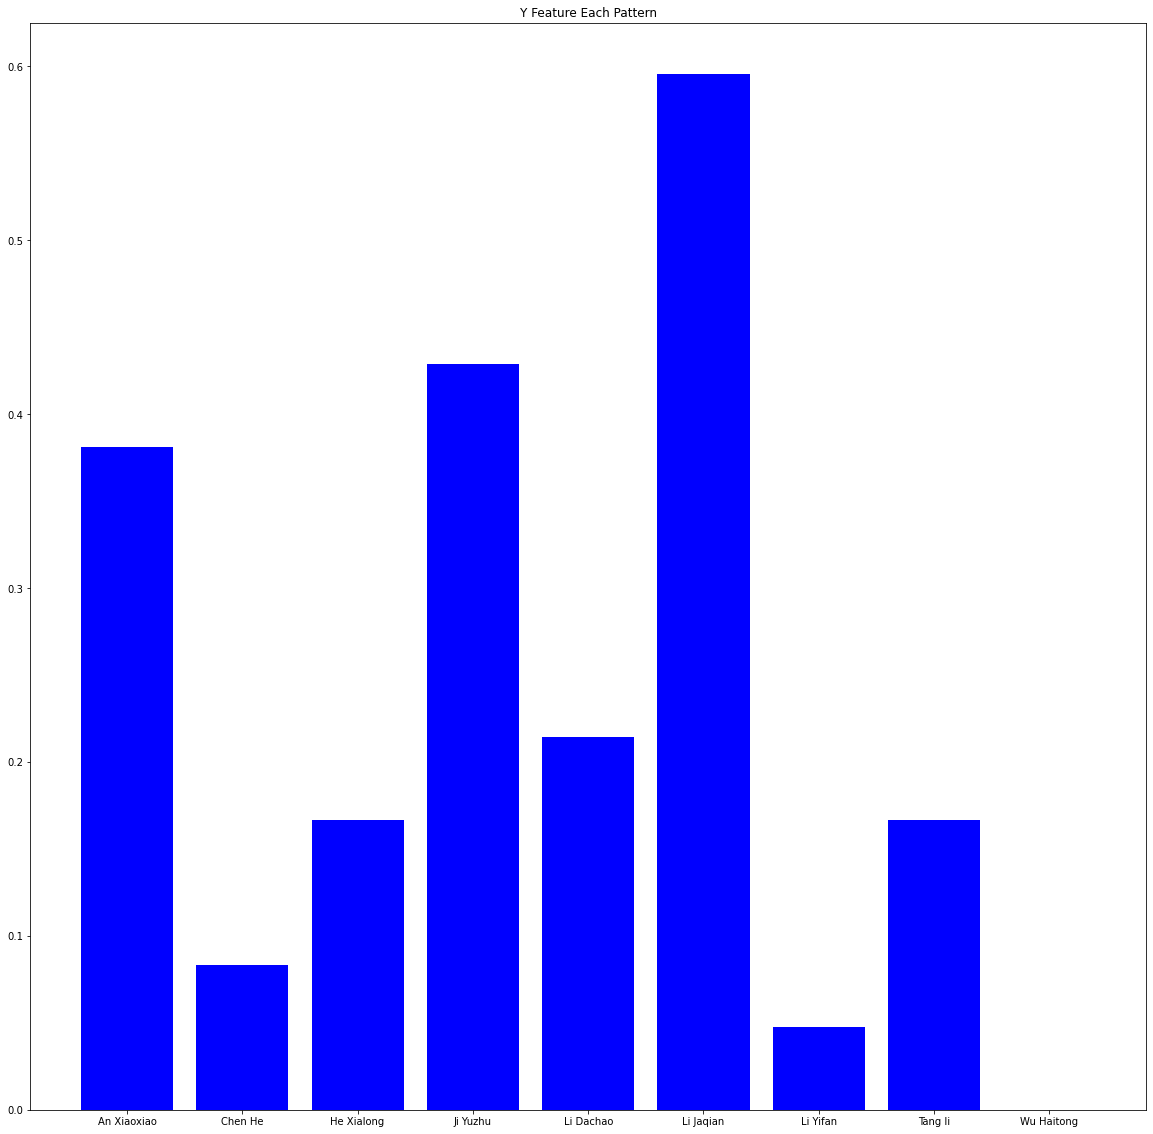

In [472]:
plt.figure(figsize=(20,20))
plt.title("Y Feature Each Pattern")
plt.bar([x for x in range(1,10)], accu, color="blue")
plt.xticks([x for x in range(1,10)], fold);

# Pressure

In [473]:
accu, fold = [],[]

In [474]:
# combine same signature dataset into one for training\
for folder in os.listdir("D:/project_py_web/FREELANCER/HR_/core/"):
    try:
        path = f"D:\project_py_web\FREELANCER\HR_\core\\"+folder+"\\".replace("\\","/")
        data = []
        # iterate multiple dataframe into one for learning
        for file in os.listdir(path):
            df = pd.read_csv(path+file)
            data.append(df)

        # combine all dataset
        df_final = pd.concat(data)
        df_final = df_final["p"]

        input_data = df_final[:-7000]
        targets = df_final[7000:]
        dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
            input_data, targets, sequence_length=4)
        for x in tqdm(dataset):
            training, label= x
        # splitting dataset
        X_train, X_test, y_train, y_test = X[:84], X[84:], y[:84], y[84:]
        model_uni = Sequential()
        model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(4,7)))
        model_uni.add(LSTM(150))
        model_uni.add(Dense(7))

        #print(model_uni.summary())
        model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        history_uni = model_uni.fit(X_train, y_train, epochs=25,validation_data=(X_test,y_test), batch_size=32, callbacks=callbacks)
        accu.append(min(history_uni.history["accuracy"]))
        fold.append(folder)
    except :
        print(folder)
        pass

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 28.16it/s]


Epoch 1/25
3/3 [==============================] - 14s 1s/step - loss: 6740748.1250 - accuracy: 0.4749 - val_loss: 6529178.5000 - val_accuracy: 0.3478

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 113ms/step - loss: 6727851.3750 - accuracy: 0.8190 - val_loss: 6527664.0000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 136ms/step - loss: 6734403.3750 - accuracy: 0.9725 - val_loss: 6527262.5000 - val_accuracy: 0.8696

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 128ms/step - loss: 6714909.6250 - accuracy: 1.0000 - val_loss: 6525060.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 137ms/step - loss: 6723901.2500 - accuracy: 0.9901 - val_loss: 6523622.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 30.19it/s]


Epoch 1/25
3/3 [==============================] - 19s 1s/step - loss: 6749885.1250 - accuracy: 0.2403 - val_loss: 6528243.0000 - val_accuracy: 0.1304

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 172ms/step - loss: 6720761.3750 - accuracy: 0.8700 - val_loss: 6526312.5000 - val_accuracy: 0.3043

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 116ms/step - loss: 6734903.1250 - accuracy: 0.9823 - val_loss: 6524750.0000 - val_accuracy: 0.5652

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 112ms/step - loss: 6745031.6250 - accuracy: 1.0000 - val_loss: 6523427.0000 - val_accuracy: 0.9565

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 99ms/step - loss: 6755725.0000 - accuracy: 1.0000 - val_loss: 6521760.5000 - val_accuracy: 1.0000

Epoch 0000

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 20.12it/s]


Epoch 1/25
3/3 [==============================] - 47s 3s/step - loss: 6764684.7500 - accuracy: 0.1583 - val_loss: 6529502.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 1s 202ms/step - loss: 6745947.0000 - accuracy: 0.8940 - val_loss: 6527994.5000 - val_accuracy: 0.7391

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 205ms/step - loss: 6726739.1250 - accuracy: 1.0000 - val_loss: 6526036.0000 - val_accuracy: 0.8696

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 187ms/step - loss: 6738669.3750 - accuracy: 1.0000 - val_loss: 6524508.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 1s 216ms/step - loss: 6728825.1250 - accuracy: 1.0000 - val_loss: 6522540.5000 - val_accuracy: 1.0000

Epoch

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:02<00:00, 20.67it/s]


Epoch 1/25
3/3 [==============================] - 23s 2s/step - loss: 6732698.1250 - accuracy: 0.1401 - val_loss: 6526871.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 1s 269ms/step - loss: 6724447.5000 - accuracy: 0.4555 - val_loss: 6526264.5000 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 207ms/step - loss: 6745338.0000 - accuracy: 0.8486 - val_loss: 6524803.5000 - val_accuracy: 0.0435

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 1s 257ms/step - loss: 6732272.0000 - accuracy: 0.9016 - val_loss: 6523596.0000 - val_accuracy: 0.7826

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 1s 257ms/step - loss: 6768391.7500 - accuracy: 1.0000 - val_loss: 6522517.0000 - val_accuracy: 0.9130

E

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.97it/s]


Epoch 1/25
3/3 [==============================] - 17s 1s/step - loss: 6747639.2500 - accuracy: 0.2547 - val_loss: 6526579.0000 - val_accuracy: 0.9565

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 147ms/step - loss: 6775304.3750 - accuracy: 0.7798 - val_loss: 6525330.0000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 169ms/step - loss: 6727900.0000 - accuracy: 1.0000 - val_loss: 6524336.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 133ms/step - loss: 6763935.5000 - accuracy: 1.0000 - val_loss: 6523396.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 150ms/step - loss: 6713608.5000 - accuracy: 1.0000 - val_loss: 6522889.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 31.24it/s]


Epoch 1/25
3/3 [==============================] - 14s 1s/step - loss: 6716711.8750 - accuracy: 0.2254 - val_loss: 6528019.0000 - val_accuracy: 0.8261

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 164ms/step - loss: 6750635.7500 - accuracy: 1.0000 - val_loss: 6526366.0000 - val_accuracy: 0.9565

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 132ms/step - loss: 6702263.5000 - accuracy: 1.0000 - val_loss: 6524379.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 145ms/step - loss: 6763075.5000 - accuracy: 1.0000 - val_loss: 6523718.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 153ms/step - loss: 6713901.2500 - accuracy: 1.0000 - val_loss: 6523113.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.69it/s]


Epoch 1/25
3/3 [==============================] - 16s 1s/step - loss: 6738560.3750 - accuracy: 0.0119 - val_loss: 6527274.5000 - val_accuracy: 0.3043

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 151ms/step - loss: 6738692.8750 - accuracy: 0.6148 - val_loss: 6525851.0000 - val_accuracy: 0.9565

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 143ms/step - loss: 6730046.7500 - accuracy: 0.9252 - val_loss: 6523612.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 155ms/step - loss: 6740525.3750 - accuracy: 0.8919 - val_loss: 6522608.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 141ms/step - loss: 6722980.6250 - accuracy: 1.0000 - val_loss: 6522505.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 27.73it/s]


Epoch 1/25
3/3 [==============================] - 14s 2s/step - loss: 6775219.3750 - accuracy: 0.4204 - val_loss: 6528387.0000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 131ms/step - loss: 6717447.3750 - accuracy: 0.9528 - val_loss: 6527358.5000 - val_accuracy: 0.1739

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 161ms/step - loss: 6770010.1250 - accuracy: 1.0000 - val_loss: 6526343.0000 - val_accuracy: 0.7826

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 140ms/step - loss: 6721061.0000 - accuracy: 1.0000 - val_loss: 6525383.0000 - val_accuracy: 0.9130

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - ETA: 0s - loss: 6692632.8333 - accuracy: 1.00 - 0s 167ms/step - loss: 6704387.6250 - accuracy: 1.0000 - val_

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 22.28it/s]


Epoch 1/25
3/3 [==============================] - 13s 1s/step - loss: 6741216.7500 - accuracy: 0.3901 - val_loss: 6524695.0000 - val_accuracy: 0.6957

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 149ms/step - loss: 6721554.8750 - accuracy: 0.7993 - val_loss: 6523385.0000 - val_accuracy: 0.6957

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 165ms/step - loss: 6764614.3750 - accuracy: 0.8328 - val_loss: 6520527.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 181ms/step - loss: 6748629.6250 - accuracy: 1.0000 - val_loss: 6518866.0000 - val_accuracy: 0.8696

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 148ms/step - loss: 6721794.5000 - accuracy: 1.0000 - val_loss: 6518190.0000 - val_accuracy: 1.0000

Epoch 000

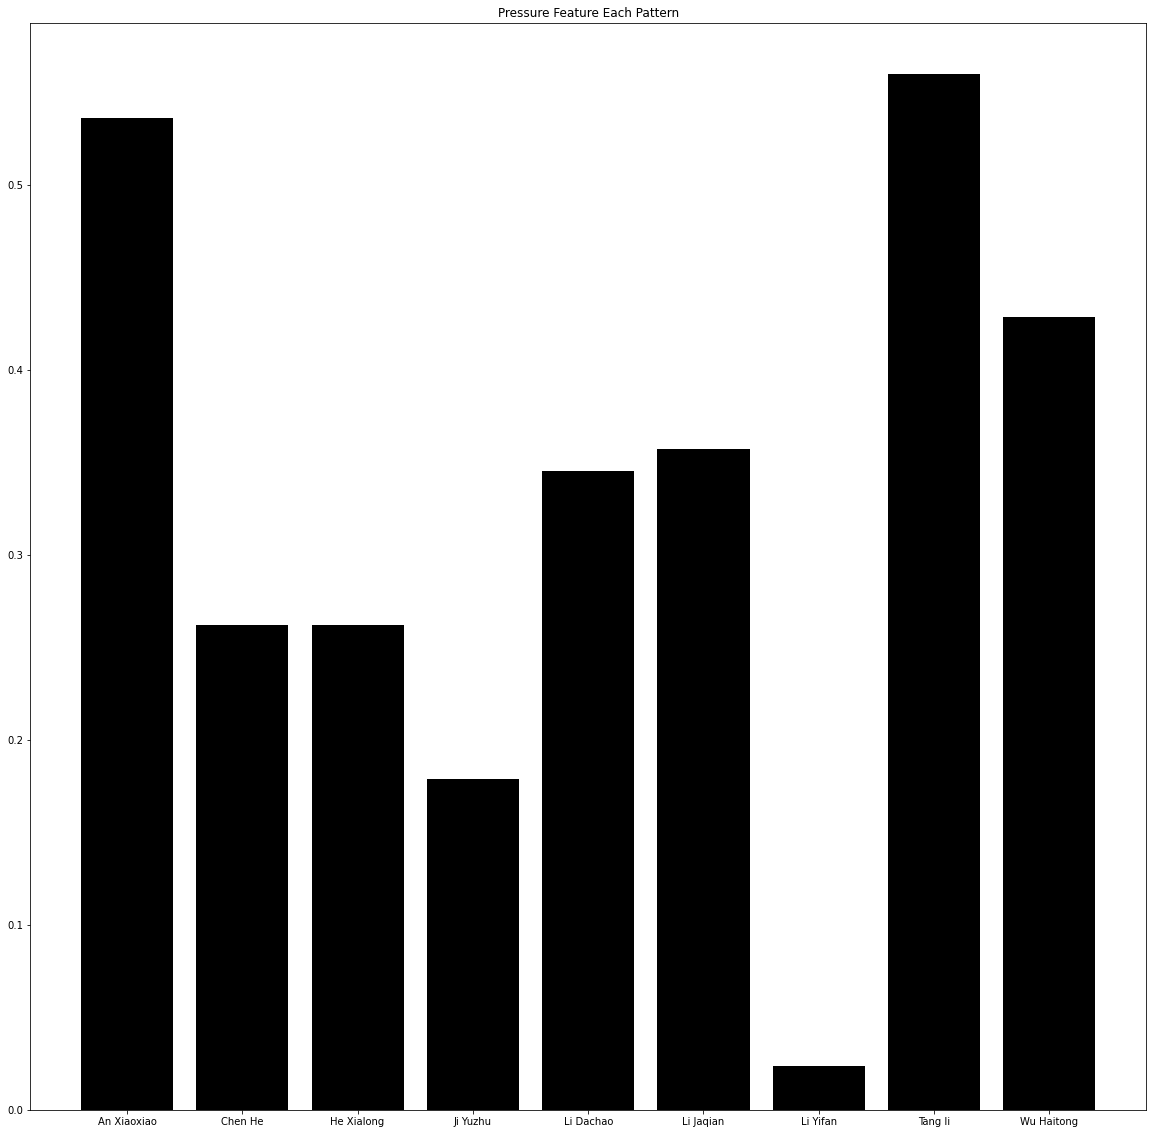

In [475]:
plt.figure(figsize=(20,20))
plt.title("Pressure Feature Each Pattern")
plt.bar([x for x in range(1,10)], accu, color="black")
plt.xticks([x for x in range(1,10)], fold);

# Button Status

In [477]:
accu, fold = [],[]

In [478]:
# combine same signature dataset into one for training\
for folder in os.listdir("D:/project_py_web/FREELANCER/HR_/core/"):
    try:
        path = f"D:\project_py_web\FREELANCER\HR_\core\\"+folder+"\\".replace("\\","/")
        data = []
        # iterate multiple dataframe into one for learning
        for file in os.listdir(path):
            df = pd.read_csv(path+file)
            data.append(df)

        # combine all dataset
        df_final = pd.concat(data)
        df_final = df_final["p"]

        input_data = df_final[:-7000]
        targets = df_final[7000:]
        dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
            input_data, targets, sequence_length=4)
        for x in tqdm(dataset):
            training, label= x
        # splitting dataset
        X_train, X_test, y_train, y_test = X[:84], X[84:], y[:84], y[84:]
        model_uni = Sequential()
        model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(4,7)))
        model_uni.add(LSTM(150))
        model_uni.add(Dense(7))

        #print(model_uni.summary())
        model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
        history_uni = model_uni.fit(X_train, y_train, epochs=25,validation_data=(X_test,y_test), batch_size=32, callbacks=callbacks)
        accu.append(min(history_uni.history["accuracy"]))
        fold.append(folder)
    except :
        print(folder)
        pass

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.61it/s]


Epoch 1/25
3/3 [==============================] - 15s 1s/step - loss: 6733159.0000 - accuracy: 0.1520 - val_loss: 6529831.0000 - val_accuracy: 0.0435

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 163ms/step - loss: 6765180.1250 - accuracy: 0.7028 - val_loss: 6528323.0000 - val_accuracy: 0.3043

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 149ms/step - loss: 6738374.0000 - accuracy: 0.9271 - val_loss: 6526245.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 140ms/step - loss: 6743258.0000 - accuracy: 1.0000 - val_loss: 6524985.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 140ms/step - loss: 6733477.2500 - accuracy: 1.0000 - val_loss: 6524530.0000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 30.11it/s]


Epoch 1/25
3/3 [==============================] - 11s 1s/step - loss: 6747085.6250 - accuracy: 0.4792 - val_loss: 6526300.0000 - val_accuracy: 0.9130

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 117ms/step - loss: 6780173.8750 - accuracy: 0.9647 - val_loss: 6525861.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 113ms/step - loss: 6764151.8750 - accuracy: 1.0000 - val_loss: 6523786.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 122ms/step - loss: 6737243.1250 - accuracy: 1.0000 - val_loss: 6521665.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 143ms/step - loss: 6734660.5000 - accuracy: 1.0000 - val_loss: 6520071.0000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 37.39it/s]


Epoch 1/25
3/3 [==============================] - 13s 1s/step - loss: 6709273.3750 - accuracy: 0.0257 - val_loss: 6526807.5000 - val_accuracy: 0.6522

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 110ms/step - loss: 6770846.5000 - accuracy: 0.1579 - val_loss: 6525089.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 105ms/step - loss: 6762702.1250 - accuracy: 0.3858 - val_loss: 6522796.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 127ms/step - loss: 6744111.2500 - accuracy: 0.6496 - val_loss: 6521595.0000 - val_accuracy: 0.9565

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 125ms/step - loss: 6754187.7500 - accuracy: 0.7204 - val_loss: 6520174.0000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:01<00:00, 30.47it/s]


Epoch 1/25
3/3 [==============================] - 13s 2s/step - loss: 6759745.0000 - accuracy: 0.1363 - val_loss: 6528243.5000 - val_accuracy: 0.3913

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 113ms/step - loss: 6739806.7500 - accuracy: 0.5831 - val_loss: 6526519.5000 - val_accuracy: 0.5652

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 124ms/step - loss: 6761466.8750 - accuracy: 0.8566 - val_loss: 6524992.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 109ms/step - loss: 6741844.5000 - accuracy: 1.0000 - val_loss: 6522889.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 128ms/step - loss: 6768854.1250 - accuracy: 1.0000 - val_loss: 6520590.5000 - val_accuracy: 1.0000

Epoch 000

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.17it/s]


Epoch 1/25
3/3 [==============================] - 10s 999ms/step - loss: 6728101.5000 - accuracy: 0.1010 - val_loss: 6526845.0000 - val_accuracy: 0.9130

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 120ms/step - loss: 6764172.6250 - accuracy: 0.4805 - val_loss: 6526306.0000 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 115ms/step - loss: 6721556.7500 - accuracy: 0.6259 - val_loss: 6525575.5000 - val_accuracy: 0.0435

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 108ms/step - loss: 6741444.6250 - accuracy: 0.7424 - val_loss: 6523883.0000 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 110ms/step - loss: 6718693.7500 - accuracy: 0.9725 - val_loss: 6521469.0000 - val_accuracy: 0.8696

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 30.48it/s]


Epoch 1/25
3/3 [==============================] - 12s 1s/step - loss: 6753561.2500 - accuracy: 0.2647 - val_loss: 6529249.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 109ms/step - loss: 6757985.6250 - accuracy: 0.8821 - val_loss: 6525783.0000 - val_accuracy: 0.9130

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 111ms/step - loss: 6750741.8750 - accuracy: 1.0000 - val_loss: 6524477.0000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 118ms/step - loss: 6712892.0000 - accuracy: 1.0000 - val_loss: 6522295.5000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 143ms/step - loss: 6712396.2500 - accuracy: 1.0000 - val_loss: 6521107.0000 - val_accuracy: 1.0000

Epoch

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.39it/s]


Epoch 1/25
3/3 [==============================] - 10s 919ms/step - loss: 6755022.1250 - accuracy: 0.1856 - val_loss: 6528193.5000 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 121ms/step - loss: 6700404.5000 - accuracy: 0.7760 - val_loss: 6525747.5000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 112ms/step - loss: 6775668.8750 - accuracy: 0.9647 - val_loss: 6522886.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 109ms/step - loss: 6728901.6250 - accuracy: 1.0000 - val_loss: 6520732.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 103ms/step - loss: 6732979.8750 - accuracy: 1.0000 - val_loss: 6519007.5000 - val_accuracy: 1.0000

Ep

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 28.23it/s]


Epoch 1/25
3/3 [==============================] - 14s 1s/step - loss: 6757441.6250 - accuracy: 0.4715 - val_loss: 6527311.5000 - val_accuracy: 0.9565

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 94ms/step - loss: 6764145.0000 - accuracy: 1.0000 - val_loss: 6525868.0000 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 164ms/step - loss: 6758692.6250 - accuracy: 1.0000 - val_loss: 6524608.5000 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 136ms/step - loss: 6710269.1250 - accuracy: 1.0000 - val_loss: 6523790.0000 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 156ms/step - loss: 6736638.5000 - accuracy: 1.0000 - val_loss: 6522736.5000 - val_accuracy: 1.0000

Epoch 0000

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 38.13it/s]


Epoch 1/25
3/3 [==============================] - 12s 2s/step - loss: 6786543.7500 - accuracy: 0.0831 - val_loss: 6527403.0000 - val_accuracy: 0.4348

Epoch 00001: val_loss did not improve from 6453390.00000
Epoch 2/25
3/3 [==============================] - 0s 126ms/step - loss: 6773264.7500 - accuracy: 0.9647 - val_loss: 6527198.0000 - val_accuracy: 0.2609

Epoch 00002: val_loss did not improve from 6453390.00000
Epoch 3/25
3/3 [==============================] - 0s 118ms/step - loss: 6696292.5000 - accuracy: 1.0000 - val_loss: 6526426.5000 - val_accuracy: 0.4348

Epoch 00003: val_loss did not improve from 6453390.00000
Epoch 4/25
3/3 [==============================] - 0s 126ms/step - loss: 6768773.3750 - accuracy: 1.0000 - val_loss: 6524729.0000 - val_accuracy: 0.7826

Epoch 00004: val_loss did not improve from 6453390.00000
Epoch 5/25
3/3 [==============================] - 0s 107ms/step - loss: 6773432.3750 - accuracy: 1.0000 - val_loss: 6522860.5000 - val_accuracy: 1.0000

Epoch 000

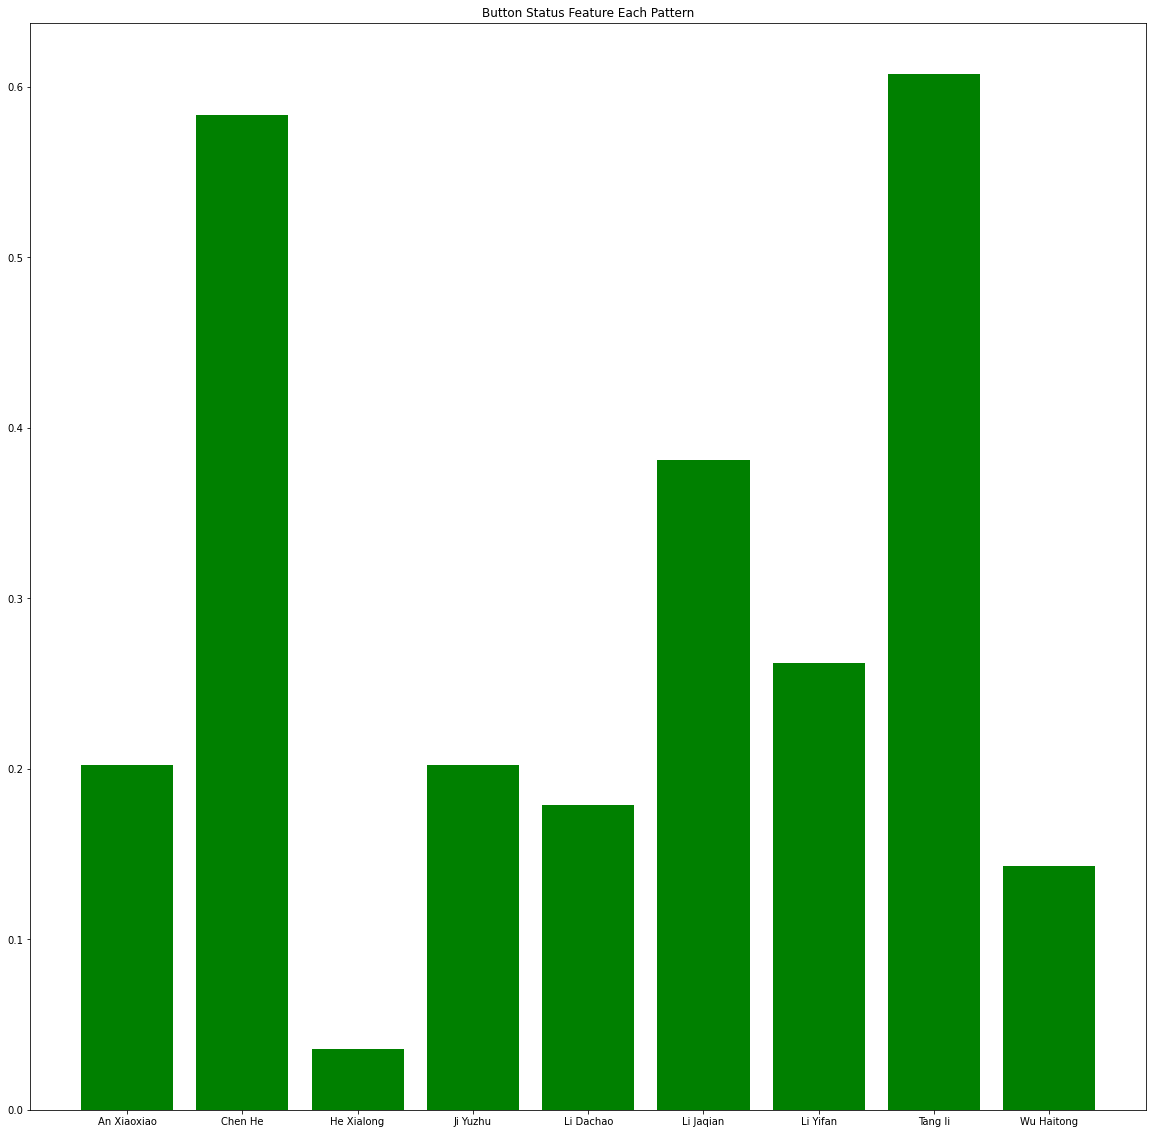

In [479]:
plt.figure(figsize=(20,20))
plt.title("Button Status Feature Each Pattern")
plt.bar([x for x in range(1,10)], accu, color="green")
plt.xticks([x for x in range(1,10)], fold);

# Euclidean Distance

In [540]:
accu, fold = [],[]

In [541]:
# combine same signature dataset into one for training\
for folder in os.listdir("D:/project_py_web/FREELANCER/HR_/core/"):
    try:
        path = f"D:\project_py_web\FREELANCER\HR_\core\\"+folder+"\\".replace("\\","/")
        data = []
        # iterate multiple dataframe into one for learning
        for file in os.listdir(path):
            df = pd.read_csv(path+file)
            data.append(df)

        # combine all dataset
        df_final = pd.concat(data)
        df_final = df_final["p"]

        input_data = df_final[:-7000]
        targets = df_final[7000:]
        dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
            input_data, targets, sequence_length=4)
        for x in tqdm(dataset):
            training, label= x
        # intializing points in
        # numpy arrays
        # calculating euclidean distance between vectors
        from math import sqrt

        # calculate euclidean distance
        def euclidean_distance(a, b):
            return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

        # define data
        row1 = np.asarray(training[:,0]).tolist()
        row2 = np.asarray(label).tolist()
        # calculate distance
        dist = euclidean_distance(row1, row2)
        #print(str(dist)[:2])
        accu.append(int(str(dist)[:2]))
        fold.append(folder)
    except :
        accu.append(0)
        print(folder)
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 33.23it/s]


He Xialong


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.80it/s]


Li Yifan
Luo jiao


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 29.71it/s]


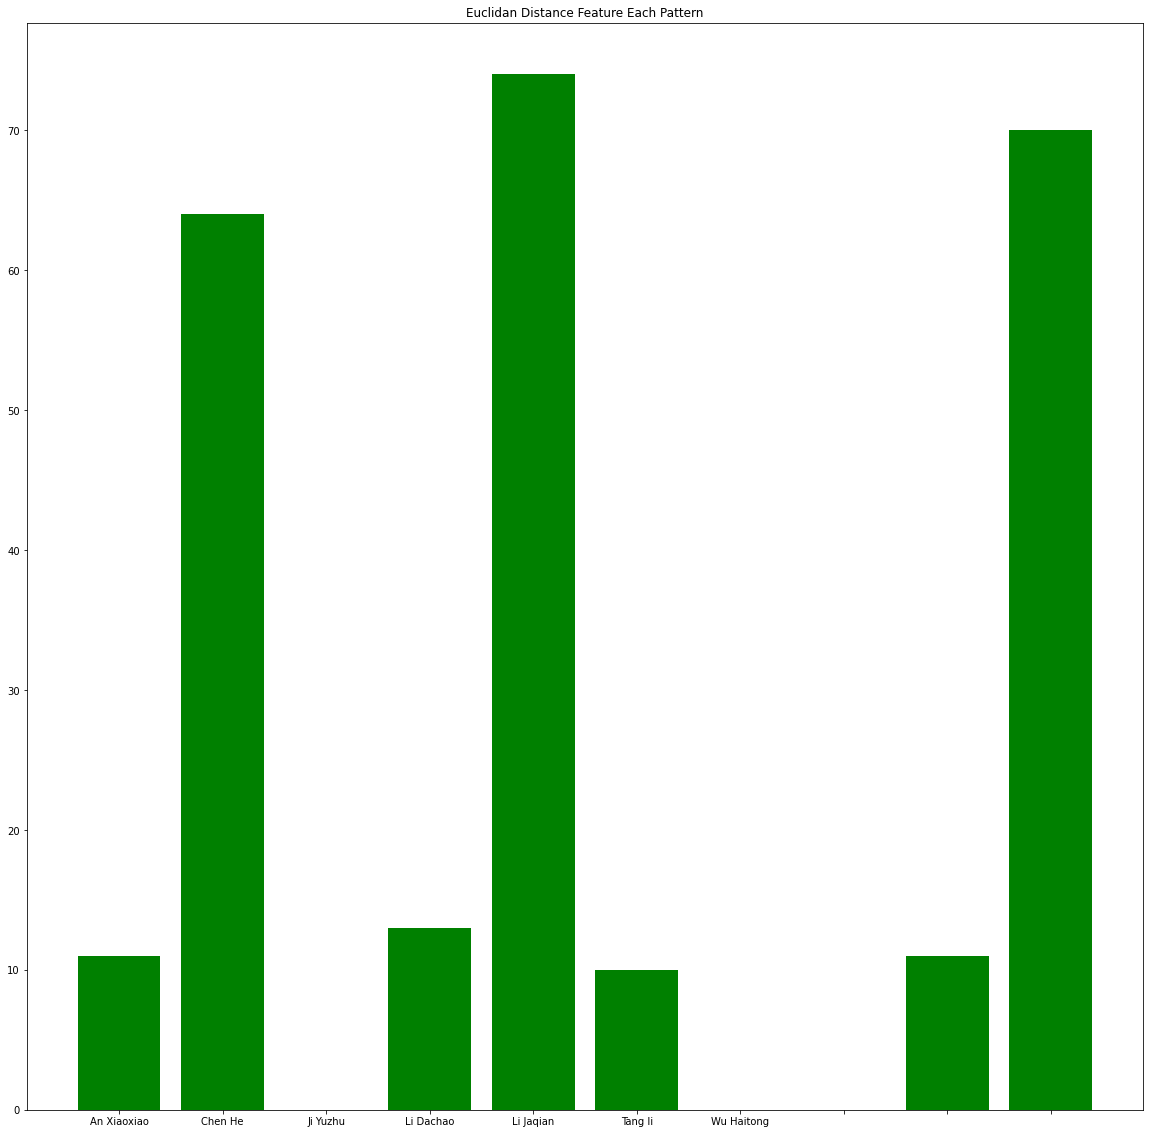

In [544]:
plt.figure(figsize=(20,20))
plt.title("Euclidan Distance Feature Each Pattern")
plt.bar([x for x in range(0,10)], accu, color="green")
plt.xticks([x for x in range(0,10)], fold);

# Correlation Classification 

In [560]:
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split

In [587]:
accu, fold = [],[]

In [588]:
for folder in os.listdir("D:/project_py_web/FREELANCER/HR_/core/"):
    try:
        path = f"D:\project_py_web\FREELANCER\HR_\core\\"+folder+"\\".replace("\\","/")
        data = []
        # iterate multiple dataframe into one for learning
        for file in os.listdir(path):
            df = pd.read_csv(path+file)
            data.append(df)

        # combine all dataset
        df_final = pd.concat(data)
        
        input_data = df_final[:-7000]
        targets = df_final[7000:]
        dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
            input_data, targets, sequence_length=4)
        
        for x in tqdm(dataset):
            training, label= x
            
        df_final = df_final.drop("Unnamed: 0", axis=1)
        X = df_final.drop("sec", axis=1)
        y = df_final.sec

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        svm = SVC(C=1.0).fit(X_train, y_train)
        preds = svm.predict(X_test)
        result = matthews_corrcoef(y_test, preds)
        
        accu.append(result)
        fold.append(folder)
        
    except Exception:
        accu.append(0)
        fold.append(folder)
        print(folder)
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.27it/s]


Luo jiao


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 31.83it/s]


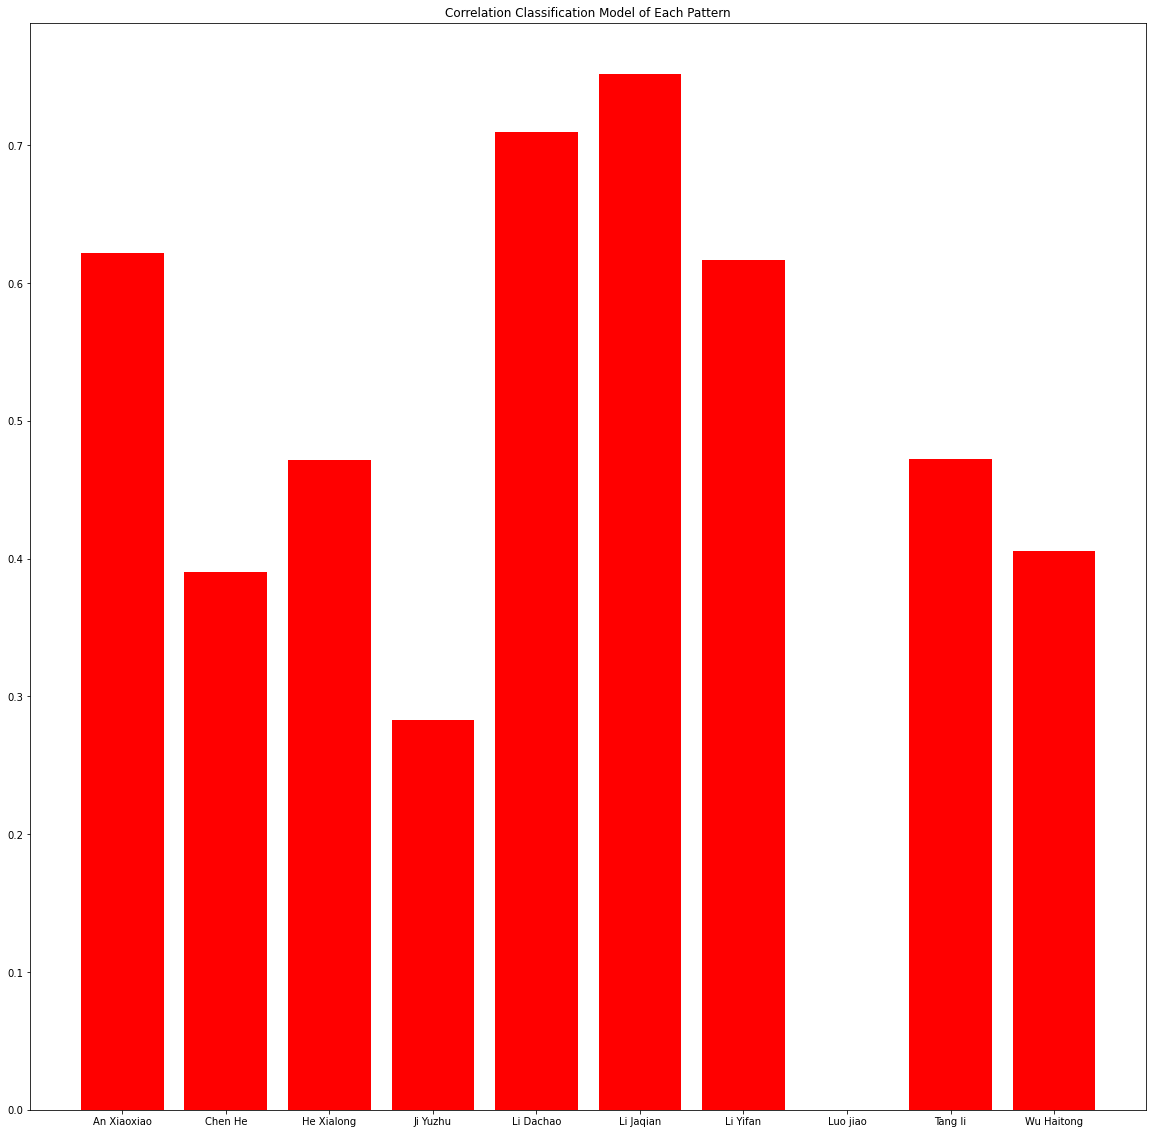

In [589]:
plt.figure(figsize=(20,20))
plt.title("Correlation Classification Model of Each Pattern")
plt.bar([x for x in range(0,10)], accu, color="red")
plt.xticks([x for x in range(0,10)], fold);

# Load Test Data

In [728]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
import cv2 as cv
from PIL import Image

# Preprocess Test Data

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]


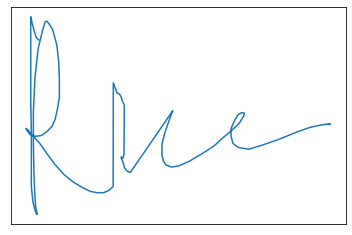

In [745]:
path = "D:/project_py_web/FREELANCER/HR_/dataset2/"
try:
    for folder in tqdm(os.listdir(path)):
        for file in os.listdir(path+folder):
            if file == ".DS_Store":
                pass
            else:
                d = pd.read_csv("D:/project_py_web/FREELANCER/HR_/dataset2/"+folder+"/"+file,skiprows=1, header=None, delimiter=" ")
                d.columns = ["x","y","timestamp","b","az","al","p"]
                plt.clf()
                plt.plot("x","y",data=d)
                plt.xticks([])
                plt.yticks([])
                plt.savefig(f"D:/project_py_web/FREELANCER/HR_/check/{file.split('.')[0]}.png")
except Exception:
    pass

In [746]:
val_path = "D:/project_py_web/FREELANCER/HR_/check/"
train_path = val_path

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:18<00:00,  1.38s/it]


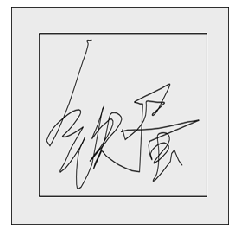

In [752]:
# convert image to grayscale and dpi
# convert original image (x,y) from dataframe to grayscale, dpi=200, waveform
for file in tqdm(os.listdir(train_path+"/")):
    convert_image_grayscale_dpi(train_path+"/"+file)
    original = Image.open(train_path+"/"+file)
    coeffs2 = pywt.dwt2(original, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    plt.imshow(LL, interpolation="nearest", cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([]);
    plt.savefig(train_path+"/"+file)

# Test Data

In [784]:
train_dir="D:/project_py_web/FREELANCER/HR_/Train/"
test_dir="D:/project_py_web/FREELANCER/HR_/Test/"

In [805]:
from keras.preprocessing.image import ImageDataGenerator
datatraingen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,fill_mode='nearest')
datatestgen=ImageDataGenerator(rescale=1./255)
data_train=datatraingen.flow_from_directory(directory=train_dir,shuffle=True,target_size=(224,224,),batch_size=32,class_mode='categorical')
data_test=datatraingen.flow_from_directory(directory=test_dir,shuffle=True,target_size=(224,224,),batch_size=32,class_mode='categorical')

Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [790]:
img_shape= (224,224,3)
base_model=keras.applications.MobileNetV2(input_shape=img_shape,include_top=False,weights='imagenet')

9412608/9406464 [==============================] - 2s 0us/step


In [806]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout
from keras.optimizers import Adam
classifier=Sequential([
    base_model,
    MaxPooling2D(2,2,padding='same'),
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=img_shape),
    BatchNormalization(),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(2,2,padding='same'),
    Flatten(),
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
    
])
classifier.layers[0].trainable=False
classifier.compile(
        optimizer=Adam(),
        metrics=['acc'],
        loss='categorical_crossentropy')

In [807]:
path_checkpoint = "model_checkpoint.h5"
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.93 and  logs.get('val_acc')>0.93):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [808]:
history_classif = classifier.fit(
    data_train,
    epochs=50,
    validation_data=data_test,
    callbacks=[myCallback(), modelckpt_callback],
)

Epoch 1/50
4/4 [==============================] - 97s 10s/step - loss: 2.6498 - acc: 0.0629 - val_loss: 2.3371 - val_acc: 0.1000

Epoch 00001: loss improved from inf to 2.39413, saving model to model_checkpoint.h5
Epoch 2/50
4/4 [==============================] - 19s 5s/step - loss: 2.2874 - acc: 0.1418 - val_loss: 2.5304 - val_acc: 0.1100

Epoch 00002: loss improved from 2.39413 to 2.29037, saving model to model_checkpoint.h5
Epoch 3/50
4/4 [==============================] - 21s 6s/step - loss: 2.2526 - acc: 0.1073 - val_loss: 2.5749 - val_acc: 0.1000

Epoch 00003: loss improved from 2.29037 to 2.25229, saving model to model_checkpoint.h5
Epoch 4/50
4/4 [==============================] - 21s 6s/step - loss: 2.2717 - acc: 0.1517 - val_loss: 2.5348 - val_acc: 0.1000

Epoch 00004: loss did not improve from 2.25229
Epoch 5/50
4/4 [==============================] - 19s 5s/step - loss: 2.3499 - acc: 0.1425 - val_loss: 2.4209 - val_acc: 0.1000

Epoch 00005: loss did not improve from 2.25229


4/4 [==============================] - 20s 5s/step - loss: 1.5905 - acc: 0.4100 - val_loss: 2.0341 - val_acc: 0.2600

Epoch 00042: loss did not improve from 1.58552
Epoch 43/50
4/4 [==============================] - 19s 5s/step - loss: 1.4663 - acc: 0.4609 - val_loss: 2.0086 - val_acc: 0.2500

Epoch 00043: loss improved from 1.58552 to 1.45051, saving model to model_checkpoint.h5
Epoch 44/50
4/4 [==============================] - 19s 5s/step - loss: 1.5884 - acc: 0.4013 - val_loss: 1.9703 - val_acc: 0.2600

Epoch 00044: loss did not improve from 1.45051
Epoch 45/50
4/4 [==============================] - 20s 5s/step - loss: 1.4274 - acc: 0.5055 - val_loss: 2.0256 - val_acc: 0.2000

Epoch 00045: loss did not improve from 1.45051
Epoch 46/50
4/4 [==============================] - 19s 5s/step - loss: 1.4879 - acc: 0.4320 - val_loss: 2.1617 - val_acc: 0.1400

Epoch 00046: loss did not improve from 1.45051
Epoch 47/50
4/4 [==============================] - 19s 6s/step - loss: 1.4864 - acc: 0

In [841]:
class_names=data_train.class_indices

validation_generator = test_datagen.flow_from_directory("D:/project_py_web/FREELANCER/HR_/test/",
                                                        target_size=(224, 224),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 100 images belonging to 10 classes.


In [822]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = classifier.predict_generator(validation_generator, 20)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_names.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[0 0 0 5 1 0 4 0 0 0]
 [0 0 0 6 2 0 2 0 0 0]
 [0 1 0 5 1 0 3 0 0 0]
 [0 1 0 5 3 0 1 0 0 0]
 [0 0 0 7 1 0 2 0 0 0]
 [0 0 0 5 0 0 4 1 0 0]
 [0 0 0 6 1 0 3 0 0 0]
 [0 0 0 4 2 0 3 0 1 0]
 [0 0 0 6 3 0 1 0 0 0]
 [0 0 0 3 1 0 4 2 0 0]]
Classification Report
              precision    recall  f1-score   support

 An Xiaoxiao       0.00      0.00      0.00        10
     Chen He       0.00      0.00      0.00        10
  He Xialong       0.00      0.00      0.00        10
    Ji Yuzhu       0.10      0.50      0.16        10
   Li Dachao       0.07      0.10      0.08        10
   Li Jaqian       0.00      0.00      0.00        10
    Li Yifan       0.11      0.30      0.16        10
    Luo jiao       0.00      0.00      0.00        10
     Tang li       0.00      0.00      0.00        10
  Wu Haitong       0.00      0.00      0.00        10

    accuracy                           0.09       100
   macro avg       0.03      0.09      0.04       100
weighted avg       0.03   

In [856]:
from sklearn.metrics import auc, roc_auc_score
all_labels =  list(class_names.keys())

In [859]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in tqdm(enumerate(all_labels)): # all_labels: no of the labels, for ex. ['cat', 'dog', 'rat']
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    plt.legend()
    plt.grid(True)
    return roc_auc_score(y_test, y_pred, average=average)

4/4 [==============================] - 10s 2s/step


10it [00:00, 240.82it/s]


0.4722222222222222

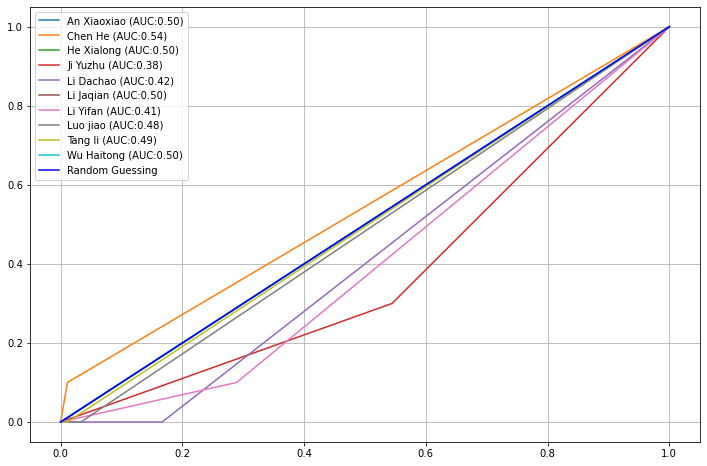

In [860]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# calling
validation_generator.reset() # resetting generator
y_pred = classifier.predict_generator(validation_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(validation_generator.classes, y_pred)

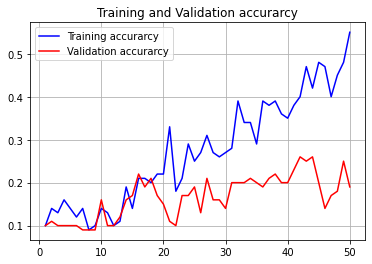

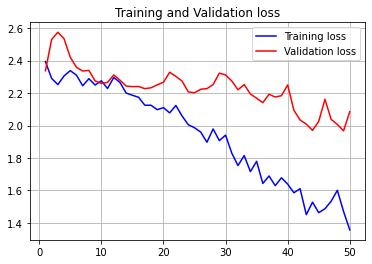

In [864]:
acc = history_classif.history['acc']
val_acc = history_classif.history['val_acc']
loss = history_classif.history['loss']
val_loss = history_classif.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.grid(True)
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.grid(True)
plt.show()

# Verification & Identification Test Data

In [920]:
# img = cv.imread(test_path+"U1S1.png")
# img = cv.resize(img, (224,224))
# np.asarray(img).shape

In [927]:
test = []
test_path = 'D:/project_py_web/FREELANCER/HR_/check/'

In [928]:
# load image and resize to target shape 224,224 store in list
for image in tqdm(os.listdir(test_path)):
    img = cv.imread(test_path+image)
    img = cv.resize(img, (224,224))
    test.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.69it/s]


In [978]:
def predict(img):
    labels = list(class_names.keys())
    a = np.asarray(img)
    a = np.expand_dims(a, axis=0)
    a = a/255
    out=classifier.predict(a)
    return labels[np.argmax(out)]+" \n "+str(np.max(out)*100)+" %"
print(predict(img))

He Xialong 
 15.074443817138672 %


In [ ]:
# load multiple image from test (containt 100 images)
# preprocessing
# predict
# add predictin to X label in each image 

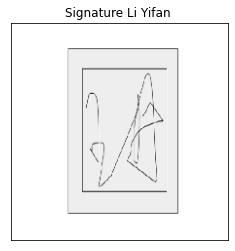

In [949]:
plt.figure()
plt.imshow(b)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Signature {} '.format(all_labels[int(pred_labels)]));

In [994]:
def display_examples():
    """
        Display 100 all images
    """
    
    fig = plt.figure(figsize=(20,30))
    fig.suptitle("Result of Image test", fontsize=16)
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test[i], cmap=plt.cm.binary)
        plt.xlabel('{}'.format(predict(test[i]).split("\n")[0]), fontsize=10)
        plt.ylabel("{}".format(predict(test[i]).split('\n')[1]));

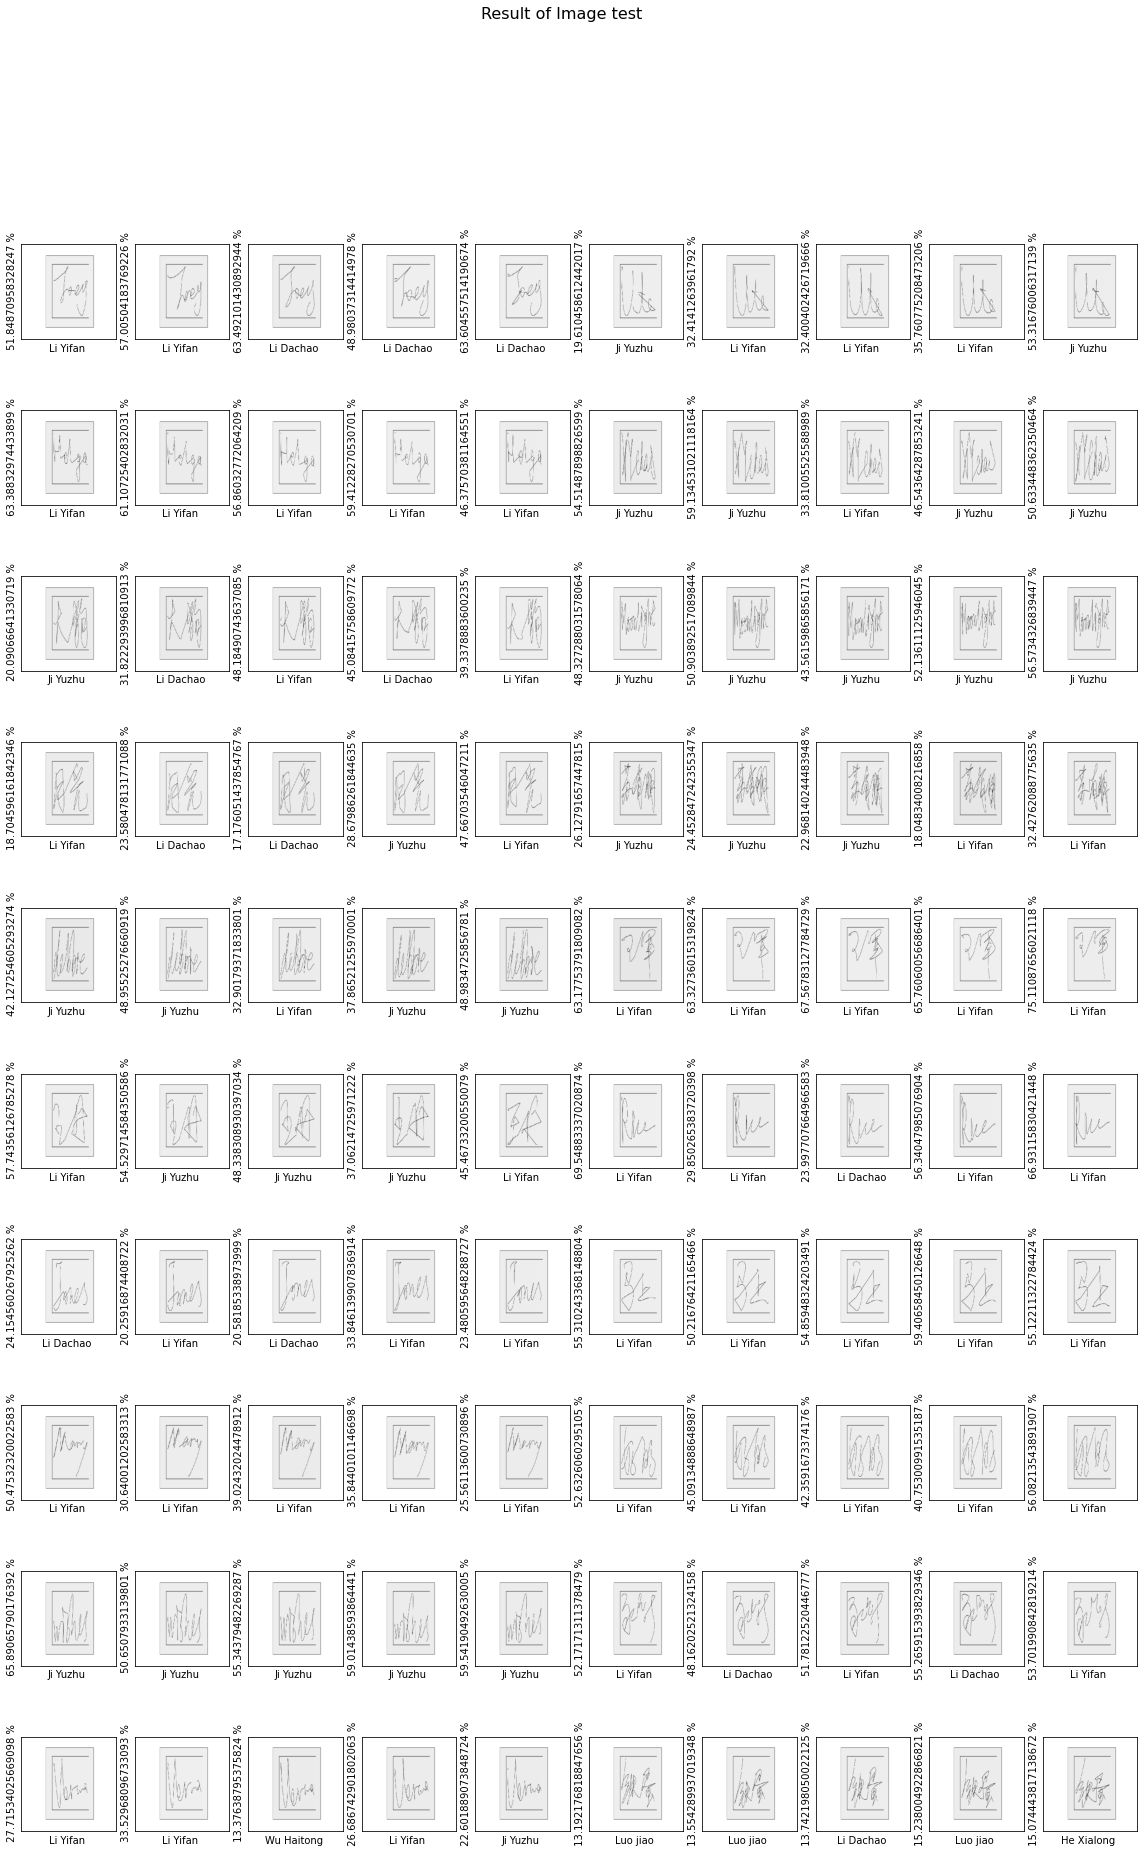

In [995]:
display_examples()

Time Spent for run All Code : 8 Hours